# Problem 1: Clustering



A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


## 1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).



In [2]:
df=pd.read_csv('bank_marketing_part1_Data.csv')
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [3]:
df.shape

(210, 7)

There are 210 rows with 7 features

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
df.dtypes

spending                        float64
advance_payments                float64
probability_of_full_payment     float64
current_balance                 float64
credit_limit                    float64
min_payment_amt                 float64
max_spent_in_single_shopping    float64
dtype: object

All features have continuous float values

In [6]:
df.describe()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [7]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

There are no null values in the dataset

In [8]:
df.duplicated().sum()


0

There are no duplicates in the dataset

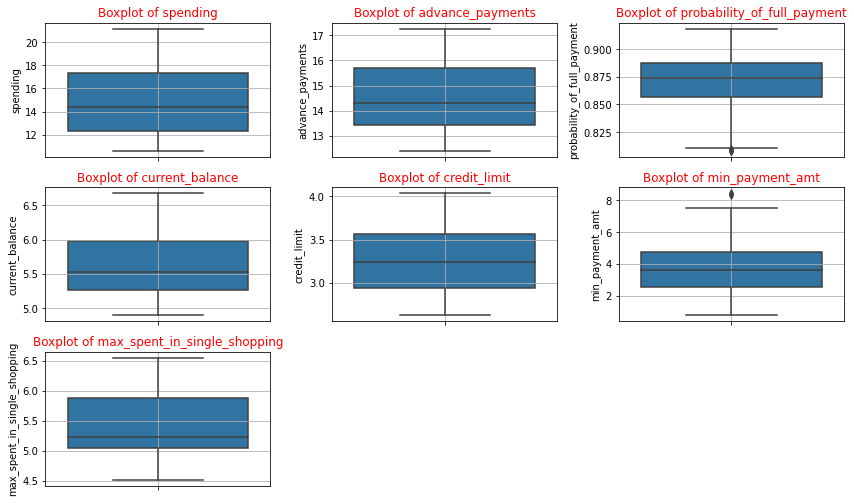

In [9]:
fig=plt.figure(figsize=(12,7))
for i in range(0,len(df.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.boxplot(y=df[df.columns[i]])
    ax.set_title('Boxplot of '+df.columns[i],color='Red')
    plt.grid()

plt.tight_layout()


probability_of_full_payment and min_payment_amt have very few outliers

#### Outlier Proportion

In [10]:
def proportion_outlier(column):
    Q1=df[column].quantile(q=0.25)
    Q3=df[column].quantile(q=0.75)
    IQR=stats.iqr(df[column])   
    
    L_outlier=Q1-1.5*(Q3-Q1)
    U_outlier=Q3+1.5*(Q3-Q1)
    print('Lower outliers in ' +column+ ' is : ', L_outlier)
    print('Upper outliers in ' +column+ ' is : ', U_outlier)
    print('Number of outliers in '+column + ' upper : ', df[df[column]>U_outlier][column].count())
    print('Number of outliers in '+column + ' lower : ', df[df[column]<L_outlier][column].count())
    print('% of Outlier in '+column + ' upper: ',round(df[df[column]>U_outlier][column].count()*100/len(df)), '%')
    print('% of Outlier in '+column + ' lower: ',round(df[df[column]<L_outlier][column].count()*100/len(df)), '%')
    print('-----------------------------------------------------')



In [11]:
from scipy import stats

lstnumericcolumns = list(df.columns.values)

for x in lstnumericcolumns:
    proportion_outlier(x)


Lower outliers in spending is :  4.717499999999999
Upper outliers in spending is :  24.8575
Number of outliers in spending upper :  0
Number of outliers in spending lower :  0
% of Outlier in spending upper:  0 %
% of Outlier in spending lower:  0 %
-----------------------------------------------------
Lower outliers in advance_payments is :  10.052499999999998
Upper outliers in advance_payments is :  19.1125
Number of outliers in advance_payments upper :  0
Number of outliers in advance_payments lower :  0
% of Outlier in advance_payments upper:  0 %
% of Outlier in advance_payments lower:  0 %
-----------------------------------------------------
Lower outliers in probability_of_full_payment is :  0.8105875
Upper outliers in probability_of_full_payment is :  0.9340875
Number of outliers in probability_of_full_payment upper :  0
Number of outliers in probability_of_full_payment lower :  3
% of Outlier in probability_of_full_payment upper:  0 %
% of Outlier in probability_of_full_payme

### Treatment of Outliers

In [12]:
def treat_outlier(column):
    # taking 5,25,75 percentile of column
    Q1=df[column].quantile(q=0.25)
    Q3=df[column].quantile(q=0.75)
    IQR=stats.iqr(df[column])   
    
    L_outlier=Q1-1.5*(Q3-Q1)
    U_outlier=Q3+1.5*(Q3-Q1)
    #Capping outliers
    return df[column].apply(lambda y:U_outlier if y > U_outlier else y).apply(lambda y: L_outlier if y < L_outlier else y)

In [13]:
for i in df.columns:    
    df[i]=treat_outlier(i)

### Univariate Analysis

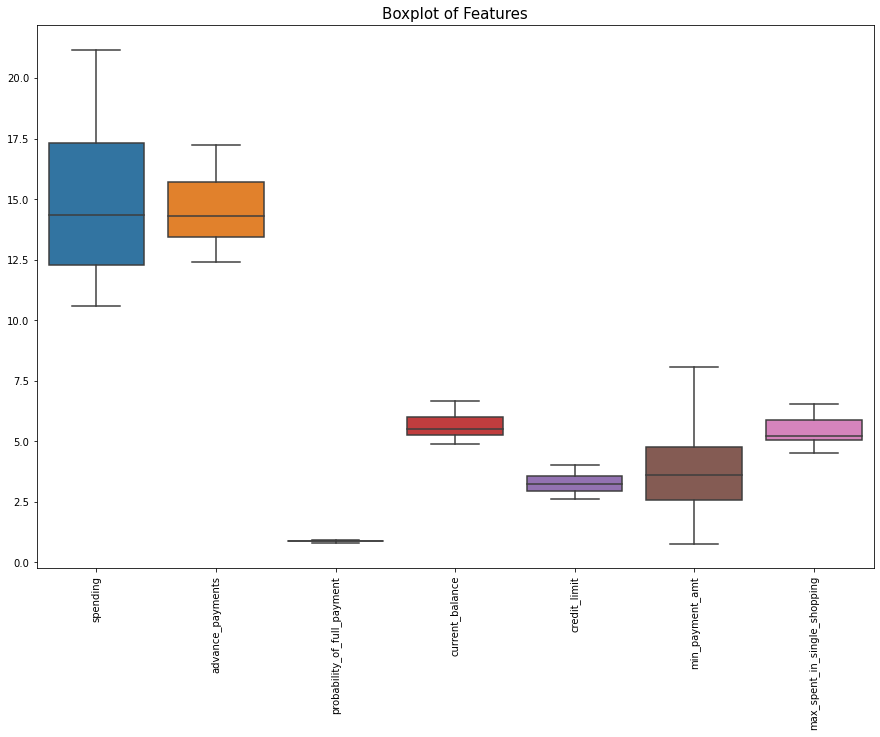

In [14]:
plt.figure(figsize=(15,10));
sns.boxplot(data=df);
#df.boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.title('Boxplot of Features',fontsize = 15)

plt.show()

In [15]:

def univariateAnalysis_numeric(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end='\n\n')
    print('Interquartile range (IQR) of spending is ', round(stats.iqr(df[column]),3))
    print('Range of values: ', round(df[column].max()-df[column].min(),3),"\n")
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(df[column], kde=True, color='g');
    plt.show()


Description of spending
----------------------------------------------------------------------------
count    210.000000
mean      14.847524
std        2.909699
min       10.590000
25%       12.270000
50%       14.355000
75%       17.305000
max       21.180000
Name: spending, dtype: float64

Interquartile range (IQR) of spending is  5.035
Range of values:  10.59 

Distribution of spending
----------------------------------------------------------------------------


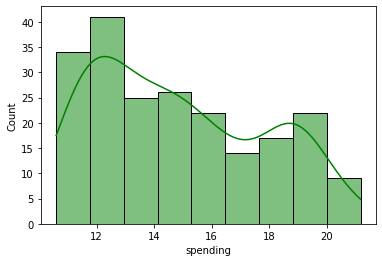

Description of advance_payments
----------------------------------------------------------------------------
count    210.000000
mean      14.559286
std        1.305959
min       12.410000
25%       13.450000
50%       14.320000
75%       15.715000
max       17.250000
Name: advance_payments, dtype: float64

Interquartile range (IQR) of spending is  2.265
Range of values:  4.84 

Distribution of advance_payments
----------------------------------------------------------------------------


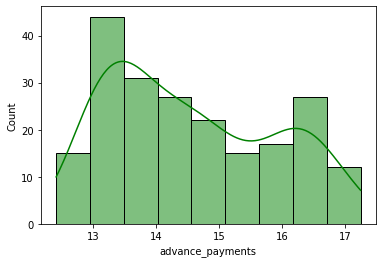

Description of probability_of_full_payment
----------------------------------------------------------------------------
count    210.000000
mean       0.871025
std        0.023560
min        0.810588
25%        0.856900
50%        0.873450
75%        0.887775
max        0.918300
Name: probability_of_full_payment, dtype: float64

Interquartile range (IQR) of spending is  0.031
Range of values:  0.108 

Distribution of probability_of_full_payment
----------------------------------------------------------------------------


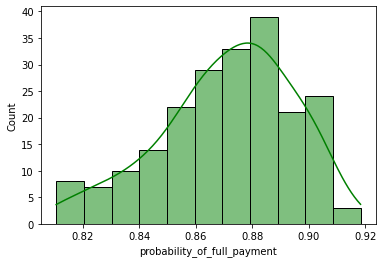

Description of current_balance
----------------------------------------------------------------------------
count    210.000000
mean       5.628533
std        0.443063
min        4.899000
25%        5.262250
50%        5.523500
75%        5.979750
max        6.675000
Name: current_balance, dtype: float64

Interquartile range (IQR) of spending is  0.718
Range of values:  1.776 

Distribution of current_balance
----------------------------------------------------------------------------


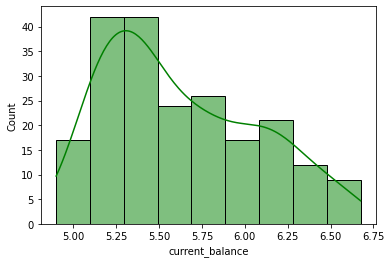

Description of credit_limit
----------------------------------------------------------------------------
count    210.000000
mean       3.258605
std        0.377714
min        2.630000
25%        2.944000
50%        3.237000
75%        3.561750
max        4.033000
Name: credit_limit, dtype: float64

Interquartile range (IQR) of spending is  0.618
Range of values:  1.403 

Distribution of credit_limit
----------------------------------------------------------------------------


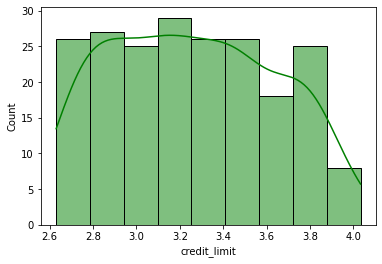

Description of min_payment_amt
----------------------------------------------------------------------------
count    210.000000
mean       3.697288
std        1.494689
min        0.765100
25%        2.561500
50%        3.599000
75%        4.768750
max        8.079625
Name: min_payment_amt, dtype: float64

Interquartile range (IQR) of spending is  2.207
Range of values:  7.315 

Distribution of min_payment_amt
----------------------------------------------------------------------------


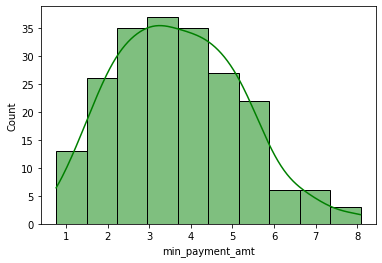

Description of max_spent_in_single_shopping
----------------------------------------------------------------------------
count    210.000000
mean       5.408071
std        0.491480
min        4.519000
25%        5.045000
50%        5.223000
75%        5.877000
max        6.550000
Name: max_spent_in_single_shopping, dtype: float64

Interquartile range (IQR) of spending is  0.832
Range of values:  2.031 

Distribution of max_spent_in_single_shopping
----------------------------------------------------------------------------


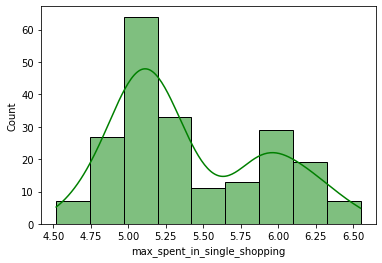

In [16]:
lstnumericcolumns = list(df.columns.values)
for x in lstnumericcolumns:
    univariateAnalysis_numeric(x)


In [17]:
for columns in df.columns:
    print('Skewness of {} is'.format(columns), round(df[columns].skew(),2))
    print('Kurtosis of {} is'.format(columns), round(df[columns].kurt(),2))


Skewness of spending is 0.4
Kurtosis of spending is -1.08
Skewness of advance_payments is 0.39
Kurtosis of advance_payments is -1.11
Skewness of probability_of_full_payment is -0.52
Kurtosis of probability_of_full_payment is -0.19
Skewness of current_balance is 0.53
Kurtosis of current_balance is -0.79
Skewness of credit_limit is 0.13
Kurtosis of credit_limit is -1.1
Skewness of min_payment_amt is 0.36
Kurtosis of min_payment_amt is -0.22
Skewness of max_spent_in_single_shopping is 0.56
Kurtosis of max_spent_in_single_shopping is -0.84


Skewness essentially measures the symmetry of the distribution.

In positively skewed, the mean of the data is greater than the median as a large number of data-pushed on the right-hand side

In negatively skewed, the mean of the data is less than the median as a large number of data-pushed on the left-hand. 

If the skewness is between -0.5 & 0.5, the data are nearly symmetrical.

If the skewness is between -1 & -0.5 (negative/left skewed) or between 0.5 & 1(positive/right skewed), the data are slightly skewed.

If the skewness is lower than -1 (negative/left skewed) or greater than 1 (positive/right skewed), the data are extremely skewed.




Kurtosis refers to the degree of presence of outliers in the distribution.

If kurtosis > 3, then it is called as Leptokurtic or heavy-tailed distribution as the kurtosis is more than normal distribution.

If kurtosis = 3, then it is called as Mesokurtic as the kurtosis is same as the normal distribution.

If kurtosis < 3, then it is called as Platykurtic or short-tailed distribution as the kurtosis is less than normal distribution.



### Bivariate Analysis

                Pairplot


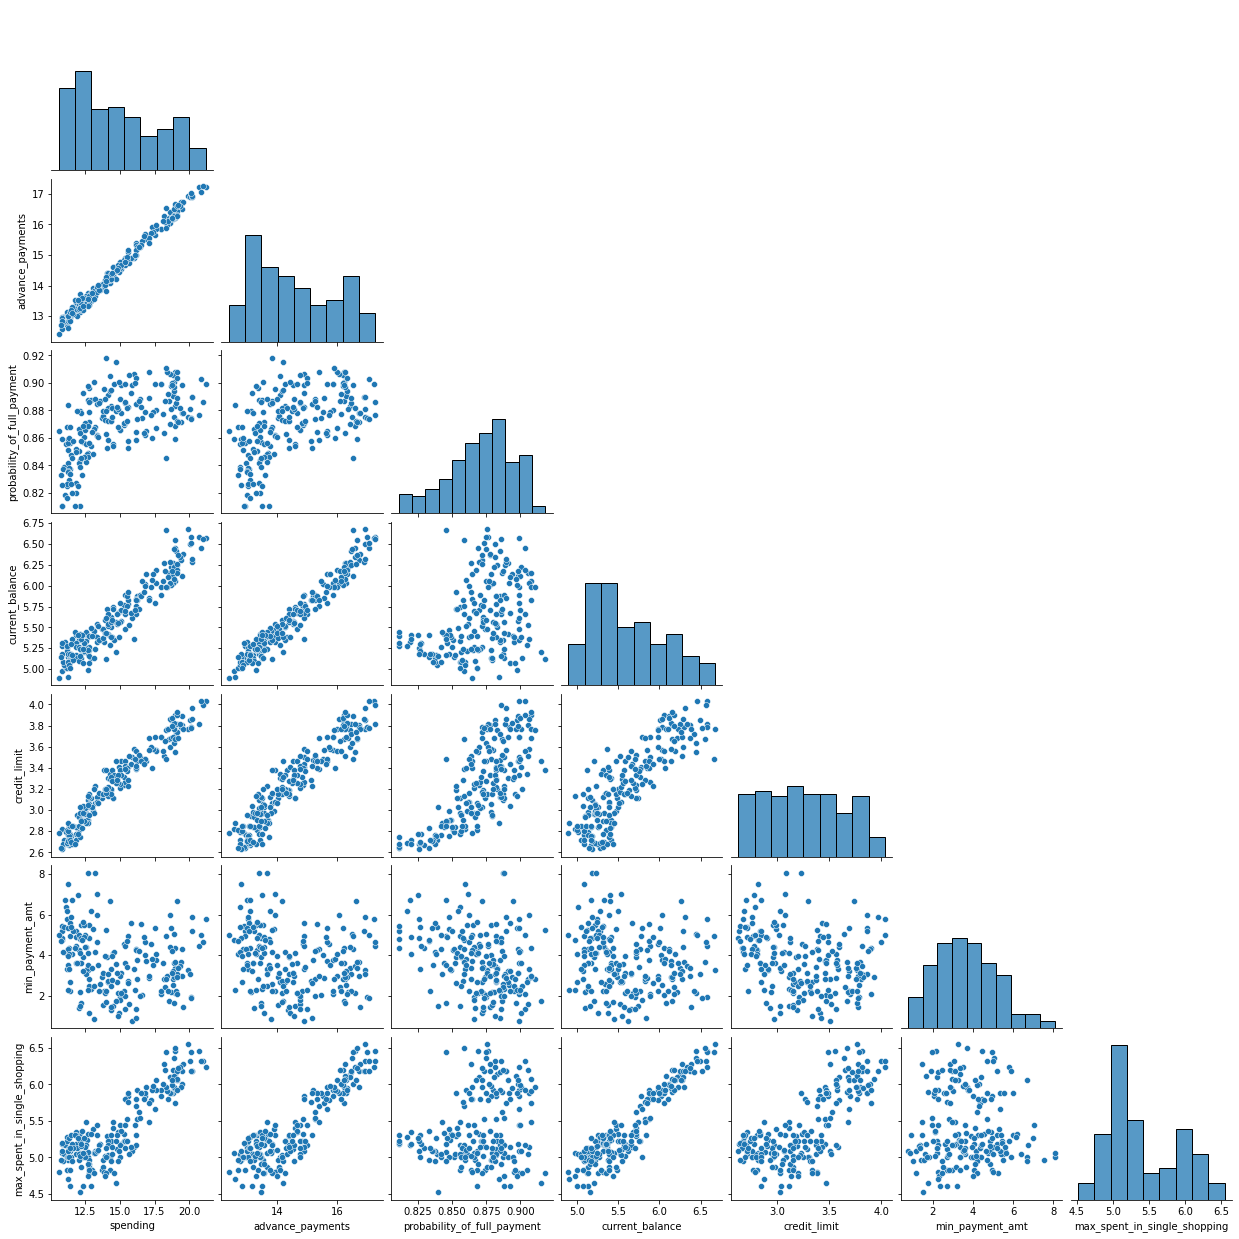

In [18]:
print('                Pairplot')
sns.pairplot(df,corner=True);


Pairplot shows the relationship between the variables in the form of scatter plot and distribution of the variable in the
form of histogram.



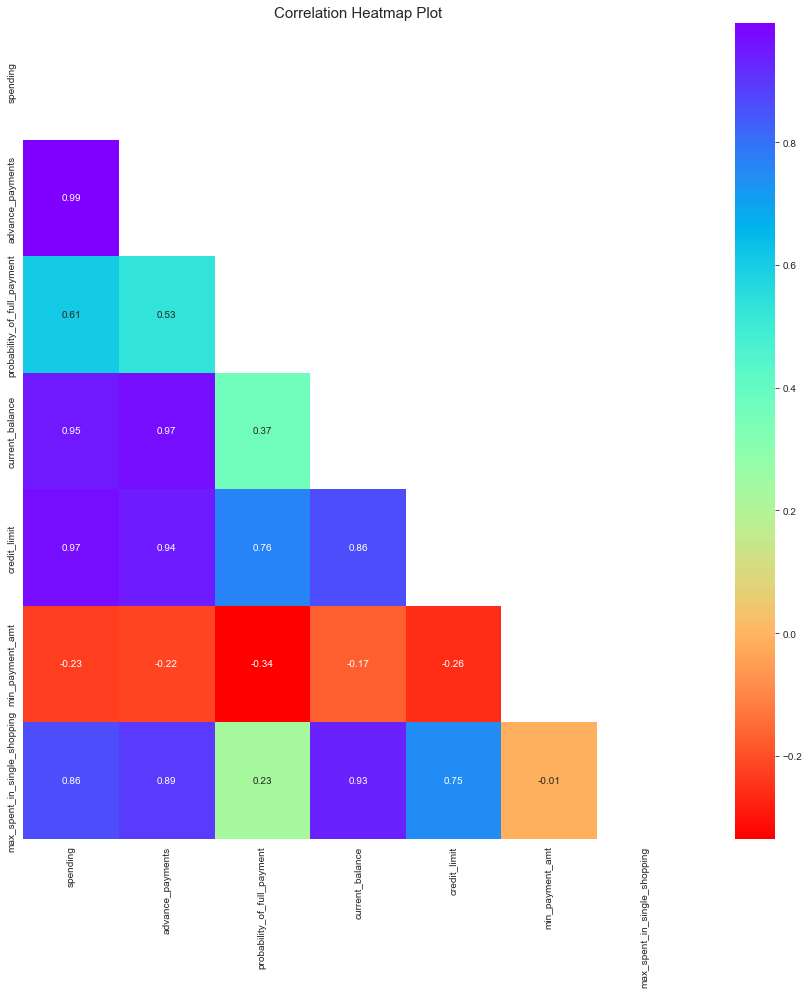

In [19]:
sns.set_style('whitegrid')

plt.figure(figsize=(15,15))
corr=df.corr()
mask = np.triu(np.ones_like(corr)) 
sns.heatmap(round(corr,3),mask=mask,fmt='.2f',annot=True,cmap='rainbow_r')
plt.title('Correlation Heatmap Plot',fontsize = 15)
plt.show()


From pairplot and heatmap we can infer that there is a strong positive correlation between 

->spending and credit_limit

->advance_payments and credit_limit

->current_balance and max_spent_in_single_shopping,

->spending and current_balance,

->advance_payments and current_balance,

->advance_payments and spending,

->spending and max_spent_in_single_shopping,

->max_spent_in_single_shopping and advance_payments,

->current_balance and credit_limit

## 1.2  Do you think scaling is necessary for clustering in this case? Justify



Clustering algorithms such as K-means do need feature scaling before they are fed to the clustering algorithm as they use distance metrics like Euclidean Distance to form the clusters.The Standard Scaler method is used for scaling the data. This method will calculate the z-score for the data points and then scale the data such that mean is equal to 0 and standard deviation is equal to 1. 



In [20]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.871025,5.628533,3.258605,3.697288,5.408071
std,2.909699,1.305959,0.023560,0.443063,0.377714,1.494689,0.491480
min,10.590000,12.410000,0.810588,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.079625,6.550000


In [21]:
from sklearn.preprocessing import StandardScaler
X = StandardScaler()
sc_df=X.fit_transform(df)
scaled_df = pd.DataFrame(sc_df,columns=df.columns)
scaled_df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


In [22]:
scaled_df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.642601e-15,-1.089076e-16,-2.994298e-16,1.512018e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.571391e+00,-1.650501e+00,-1.668209e+00,-1.966425e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-6.009681e-01,-8.286816e-01,-8.349072e-01,-7.616981e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.031721e-01,-2.376280e-01,-5.733534e-02,-6.591519e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.126469e-01,7.945947e-01,8.044956e-01,7.185591e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.011371e+00,2.367533e+00,2.055112e+00,2.938945e+00,2.328998e+00


In [23]:
df.var()

spending                        8.466351
advance_payments                1.705528
probability_of_full_payment     0.000555
current_balance                 0.196305
credit_limit                    0.142668
min_payment_amt                 2.234095
max_spent_in_single_shopping    0.241553
dtype: float64

Spending has a variance of 8.46 whereas other variables variance lie between 0 and 2.3. 


In [24]:
scaled_df.var()

spending                        1.004785
advance_payments                1.004785
probability_of_full_payment     1.004785
current_balance                 1.004785
credit_limit                    1.004785
min_payment_amt                 1.004785
max_spent_in_single_shopping    1.004785
dtype: float64

Variance values of all the features are the same in the scaled data

## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them



### Dendrogram - Average

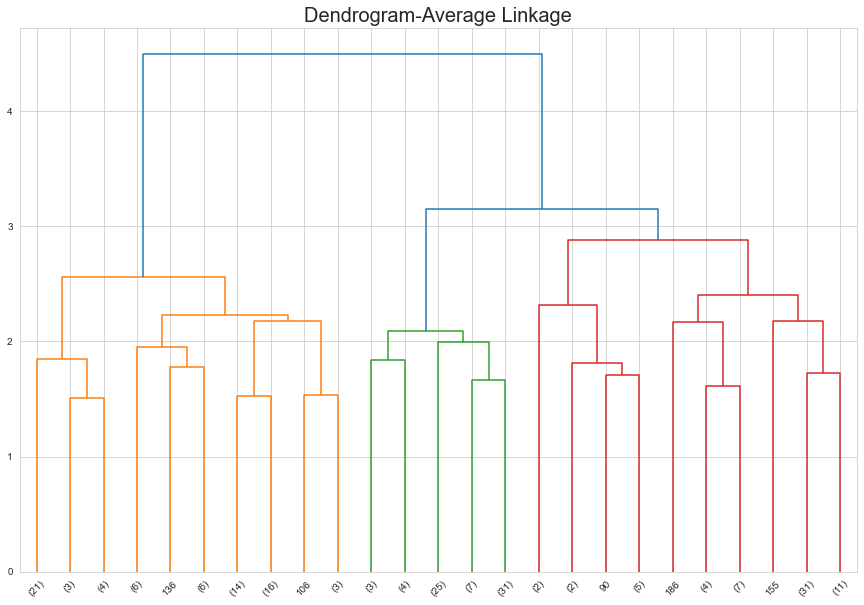

In [25]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
link_avg = linkage(scaled_df, method = 'average')
dend2 = dendrogram(link_avg,truncate_mode='lastp',p = 25)
plt.title('Dendrogram-Average Linkage',fontsize = 20);


### Dendrogram - Ward

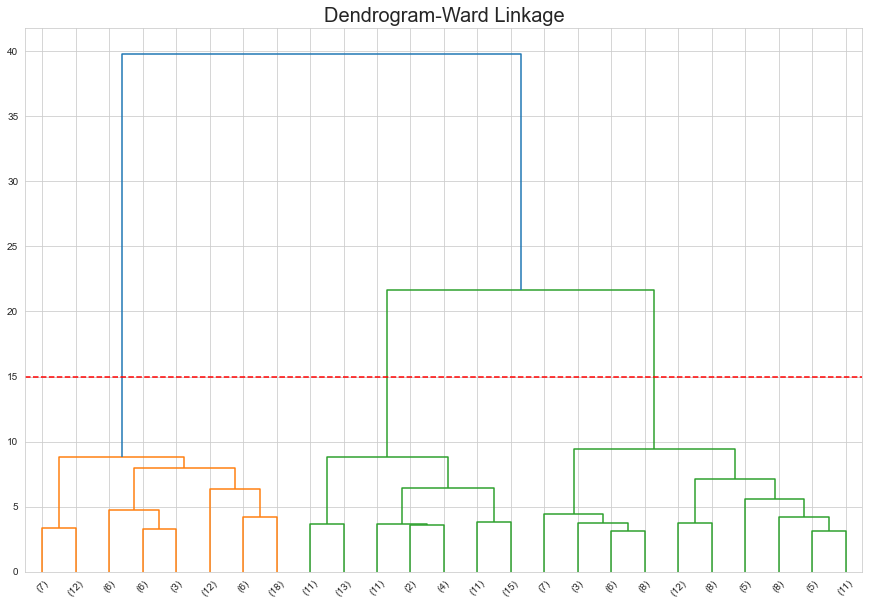

In [26]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')
link_ward = linkage(scaled_df, method = 'ward')
dend3 = dendrogram(link_ward,truncate_mode='lastp',p = 25)
plt.axhline(y = 15 , color = 'red', linestyle = '--');
plt.title('Dendrogram-Ward Linkage',fontsize = 20);


Dendrogram from both the linkage methods (average and ward) shows that there are 3 clusters of data points based on the business context of having 3 types of customers such as low spenders of money,medium spenders of money and high spenders of money. Red line is drawn at 15 in the Denrogram with Ward Linkage because there is no horizotal line intersecting the green vertical lines. The red lines intersects the 3 lines so the number of clusters is taken as 3. Also in Dendrogram with average linkage we can see that there are 3 coloured clusters: red,green and blue.

### Fcluster Method

Form flat clusters from the hierarchical clustering using the criterion maxclust which sets the maximun number of clusters and with 3 clusters.



In [27]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(link_ward, 3, criterion='maxclust')
clusters


array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [28]:
fcluster_df=df.copy()
fcluster_df['clusters'] = clusters
fcluster_df.head()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [29]:
fcluster_df['clusters'].value_counts()

3    73
1    70
2    67
Name: clusters, dtype: int64

In [30]:
fcluster_df.groupby('clusters').mean().T

clusters,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848155,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.940302,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178


### Agglomerative clustering

Agglomerative clustering is done using the euclidean distance as the value in the affinity parameter ,linkage method as average and with 3 clusters.

In [31]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
Cluster_agglo=cluster.fit_predict(scaled_df)
agglo_df=df.copy()
agglo_df['clusters'] = Cluster_agglo
agglo_df.head()



,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [32]:
agglo_df['clusters'].value_counts()

1    75
2    70
0    65
Name: clusters, dtype: int64

In [33]:
agglo_df.groupby('clusters').mean().T

clusters,0,1,2
spending,14.217077,18.129200,11.916857
advance_payments,14.195846,16.058000,13.291000
probability_of_full_payment,0.884869,0.881595,0.846845
current_balance,5.442000,6.135747,5.258300
credit_limit,3.253508,3.648120,2.846000
min_payment_amt,2.759007,3.650200,4.619000
max_spent_in_single_shopping,5.055569,5.987040,5.115071


Both Agglomerative and fclster have around the same mean value for the features of all the clusters. The number of data points distribution for all 3 clusters in both the methods are nearly the same

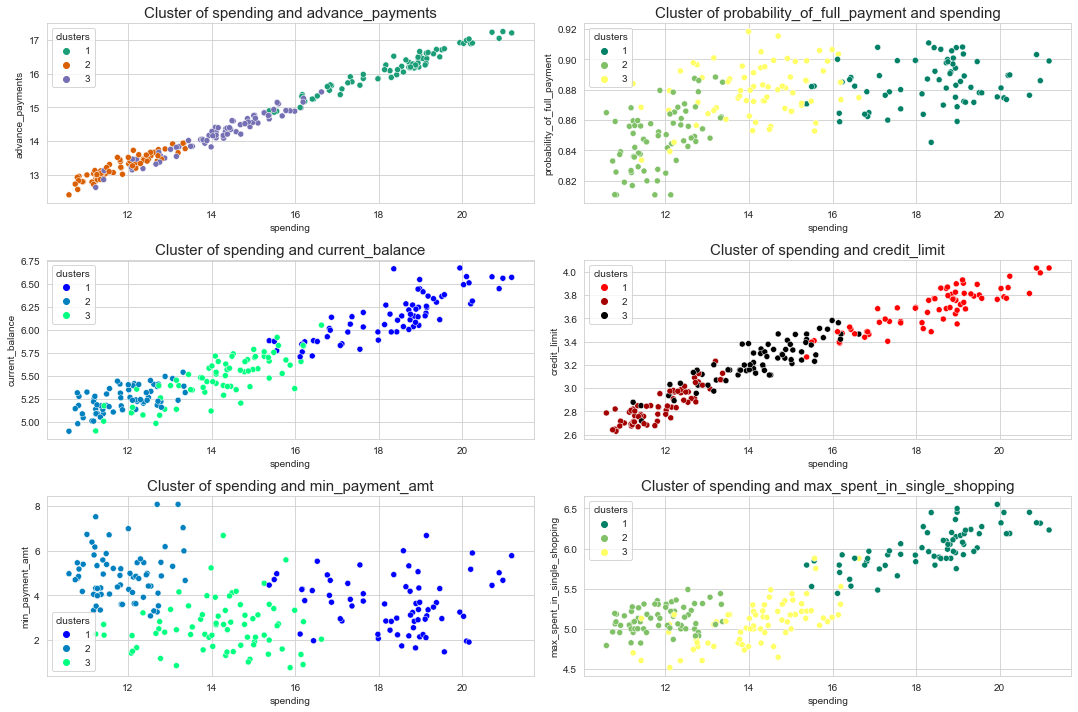

In [34]:
plt.figure(figsize=(15,10))
sns.set_style('whitegrid')

plt.subplot(3,2,1)
sns.scatterplot(y='advance_payments', x='spending', hue='clusters', data=fcluster_df, palette='Dark2')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and advance_payments', fontsize = 15)

plt.subplot(3,2,2)
sns.scatterplot(y='probability_of_full_payment', x='spending', hue='clusters', data=fcluster_df, palette='summer')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of probability_of_full_payment and spending', fontsize = 15);


plt.subplot(3,2,3)
sns.scatterplot(y='current_balance', x='spending', hue='clusters', data=fcluster_df, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and current_balance', fontsize = 15)

plt.subplot(3,2,4)
sns.scatterplot(y='credit_limit', x='spending', hue='clusters', data=fcluster_df, palette='flag')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and credit_limit', fontsize = 15);

plt.subplot(3,2,5)
sns.scatterplot(y='min_payment_amt', x='spending', hue='clusters', data=fcluster_df, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and min_payment_amt', fontsize = 15);

plt.subplot(3,2,6)
sns.scatterplot(y='max_spent_in_single_shopping', x='spending', hue='clusters', data=fcluster_df, palette='summer')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of spending and max_spent_in_single_shopping', fontsize = 15);




plt.tight_layout()

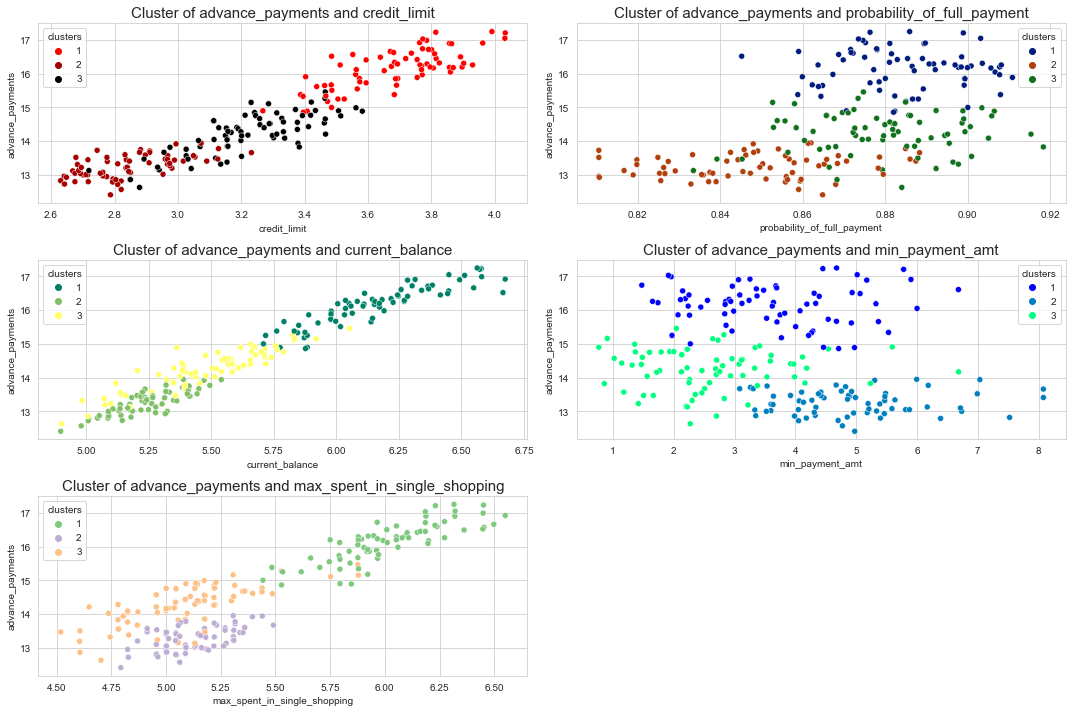

In [35]:
plt.figure(figsize=(15,10))

plt.subplot(3,2,1)
sns.scatterplot(y='advance_payments', x='credit_limit', hue='clusters', data=fcluster_df, palette='flag')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of advance_payments and credit_limit', fontsize = 15);

plt.subplot(3,2,2)
sns.scatterplot(y='advance_payments', x='probability_of_full_payment', hue='clusters', data=fcluster_df, palette='dark')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of advance_payments and probability_of_full_payment', fontsize = 15);

plt.subplot(3,2,3)
sns.scatterplot(y='advance_payments', x='current_balance', hue='clusters', data=fcluster_df, palette='summer')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of advance_payments and current_balance', fontsize = 15);

plt.subplot(3,2,4)
sns.scatterplot(y='advance_payments', x='min_payment_amt', hue='clusters', data=fcluster_df, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of advance_payments and min_payment_amt', fontsize = 15);

plt.subplot(3,2,5)
sns.scatterplot(y='advance_payments', x='max_spent_in_single_shopping', hue='clusters', data=fcluster_df, palette='Accent')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of advance_payments and max_spent_in_single_shopping', fontsize = 15);


plt.tight_layout()

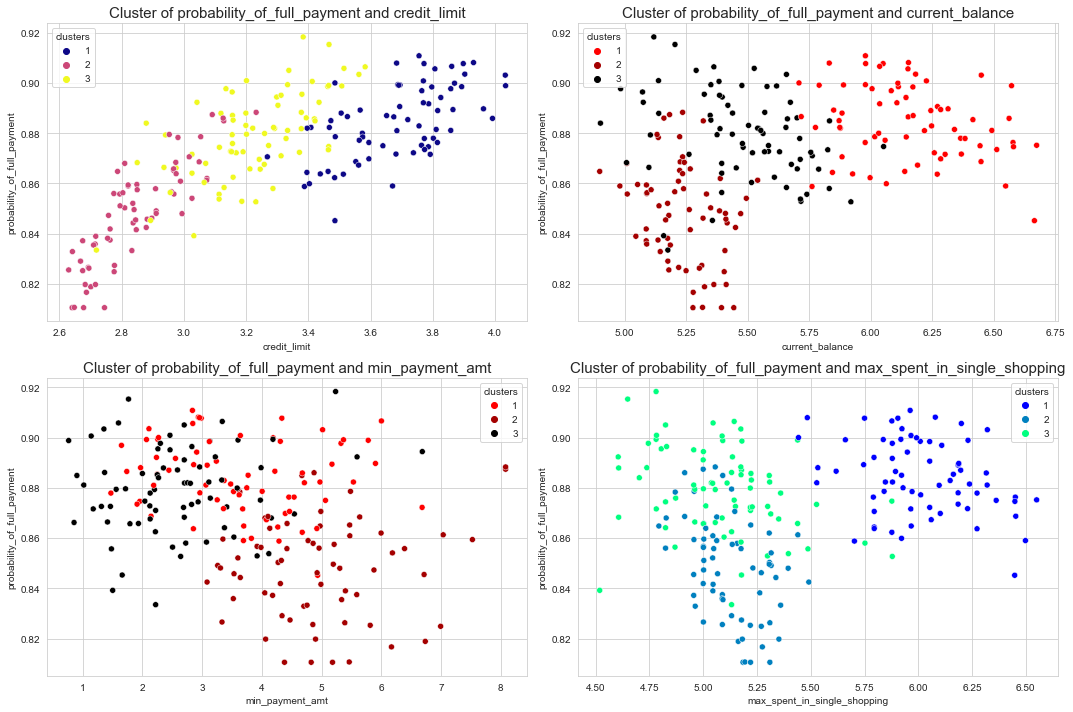

In [36]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(y='probability_of_full_payment', x='credit_limit', hue='clusters', data=fcluster_df, palette='plasma')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of probability_of_full_payment and credit_limit', fontsize = 15);

plt.subplot(2,2,2)
sns.scatterplot(y='probability_of_full_payment', x='current_balance', hue='clusters', data=fcluster_df, palette='flag')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of probability_of_full_payment and current_balance', fontsize = 15);

plt.subplot(2,2,3)
sns.scatterplot(y='probability_of_full_payment', x='min_payment_amt', hue='clusters', data=fcluster_df, palette='flag')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of probability_of_full_payment and min_payment_amt', fontsize = 15);

plt.subplot(2,2,4)
sns.scatterplot(y='probability_of_full_payment', x='max_spent_in_single_shopping', hue='clusters', data=fcluster_df, palette='winter')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of probability_of_full_payment and max_spent_in_single_shopping', fontsize = 15);


plt.tight_layout()

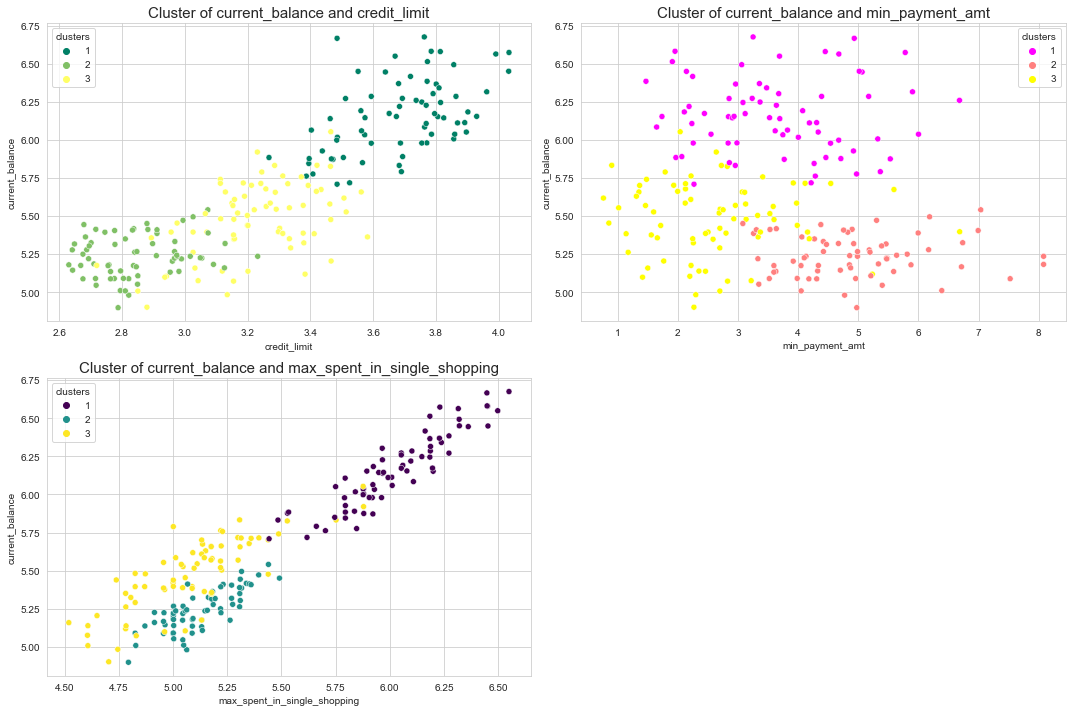

In [37]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(y='current_balance', x='credit_limit', hue='clusters', data=fcluster_df, palette='summer')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of current_balance and credit_limit', fontsize = 15);

plt.subplot(2,2,2)
sns.scatterplot(y='current_balance', x='min_payment_amt', hue='clusters', data=fcluster_df, palette='spring')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of current_balance and min_payment_amt', fontsize = 15);

plt.subplot(2,2,3)
sns.scatterplot(y='current_balance', x='max_spent_in_single_shopping', hue='clusters', data=fcluster_df, palette='viridis')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of current_balance and max_spent_in_single_shopping', fontsize = 15);


plt.tight_layout()

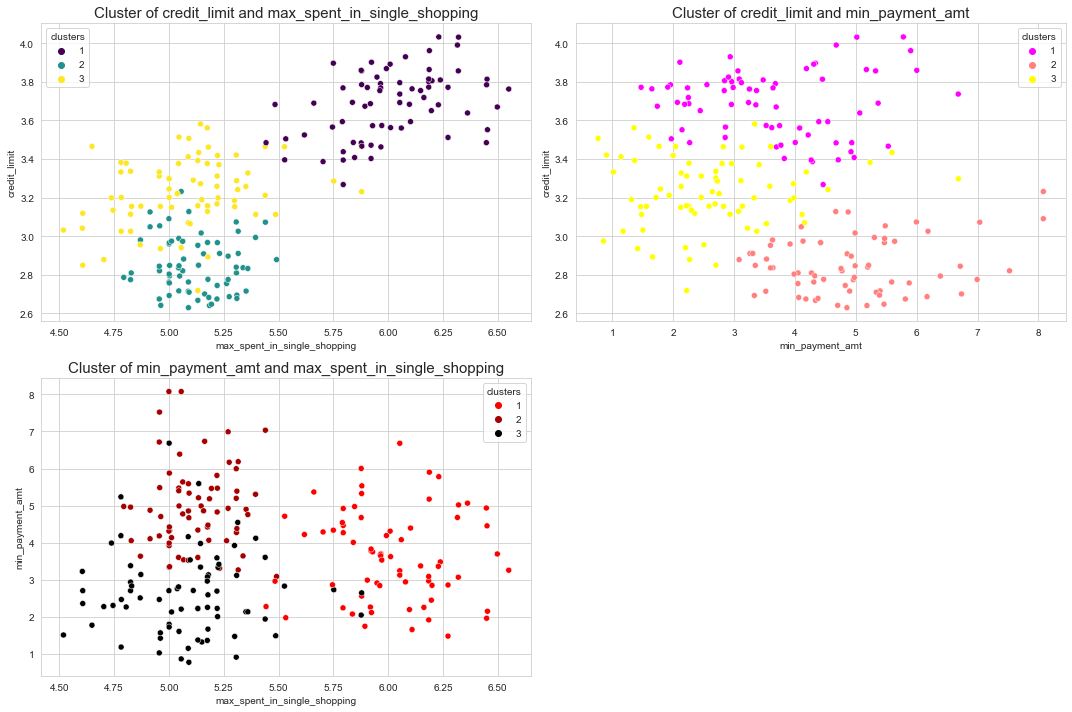

In [38]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.scatterplot(y='credit_limit', x='max_spent_in_single_shopping', hue='clusters', data=fcluster_df, palette='viridis')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of credit_limit and max_spent_in_single_shopping', fontsize = 15);

plt.subplot(2,2,2)
sns.scatterplot(y='credit_limit', x='min_payment_amt', hue='clusters', data=fcluster_df, palette='spring')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of credit_limit and min_payment_amt', fontsize = 15);

plt.subplot(2,2,3)
sns.scatterplot(y='min_payment_amt', x='max_spent_in_single_shopping', hue='clusters', data=fcluster_df, palette='flag')
sns.set_style('whitegrid')
sns.set_palette('bright')
plt.title('Cluster of min_payment_amt and max_spent_in_single_shopping', fontsize = 15);


plt.tight_layout()

In all the above plots we can see that the 3 clusters have distinguishable boundaries. Hence 3 is the optimum number of clusters as it is also suits the business context as categorising the people as low spenders, medium spenders and high spenders.

## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.



Kmeans clustering is applied with different number of clusters ranging from 1 to 10 , Their corresponding total wss and silhouette score is calculated and plotted to determine the optimum number of clusters.

In [39]:
wss = []
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)
wss


[1469.999999999999,
 659.14740095485,
 430.298481751223,
 371.0356644664012,
 325.9741284729876,
 289.45524862464833,
 263.859944426353,
 239.94446635017925,
 220.59353946108112,
 205.7633419678701]

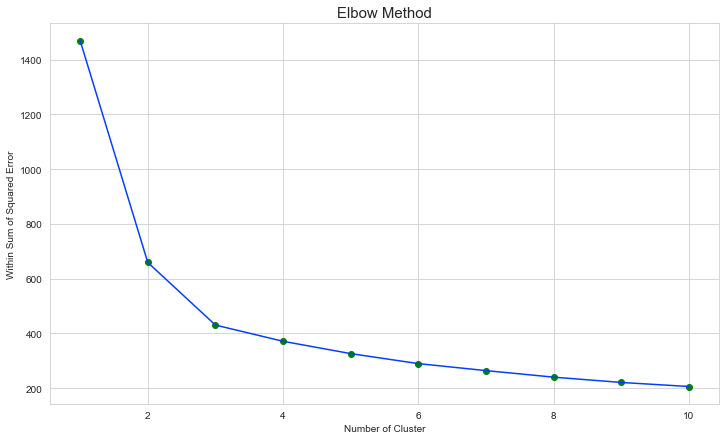

In [40]:
plt.figure(figsize=(12,7));
i = [i for i in range(1, 11)]
plt.plot(i, wss);
plt.scatter(i, wss, c='g');
plt.title('Elbow Method', fontsize = 15);
plt.xlabel('Number of Cluster');
plt.ylabel('Within Sum of Squared Error');


3 clusters is chosen to be optimum, where addition of one more cluster does not lower the value of total WCSS appreciably. From 1->2 there was a drop of around 800, 2->3 there is a decrease of around 200. Since there is no significant drop of total wss from 3->4 and 4->5 which is around 60 and 45 respectively I pick 3 and 4 as the for optimum number of clusters.Elbow occurs at these points.

In [41]:
from sklearn.metrics import silhouette_samples, silhouette_score
sil_sc = []
for i in range(2,11):
    km = KMeans(n_clusters=i)
    km.fit(scaled_df)
    labels = km.labels_
    sil = silhouette_score(scaled_df,labels)
    print('Number of Clusters :', i,' Silhouette Score :', sil)
    sil_sc.append(sil)


Number of Clusters : 2  Silhouette Score : 0.46560100442748986
Number of Clusters : 3  Silhouette Score : 0.4008059221522216
Number of Clusters : 4  Silhouette Score : 0.3275850791949873
Number of Clusters : 5  Silhouette Score : 0.28665397420054717
Number of Clusters : 6  Silhouette Score : 0.28202953848971773
Number of Clusters : 7  Silhouette Score : 0.26638963568371493
Number of Clusters : 8  Silhouette Score : 0.26022036479418587
Number of Clusters : 9  Silhouette Score : 0.25509640529778443
Number of Clusters : 10  Silhouette Score : 0.24595921136139773


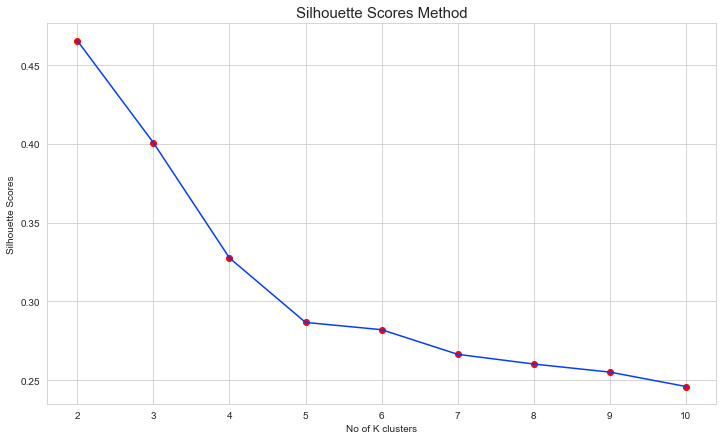

In [42]:
plt.figure(figsize=(12,7));
i = [i for i in range(2, 11)]
plt.plot(i, sil_sc);
plt.scatter(i, sil_sc, c='r');
plt.title('Silhouette Scores Method', fontsize = 15)
plt.xlabel('No of K clusters')
plt.ylabel('Silhouette Scores')
plt.show();



The maximum value of the statistic indicates the optimum value of clusters. Cluster 3 has more silhouette score than Cluster 4. Hence 3 is the optimum value of cluster. 

In [43]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
kmea=df.copy()
kmea["clusters"] = k_means.labels_
kmea.head()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


<Figure size 3600x3600 with 0 Axes>

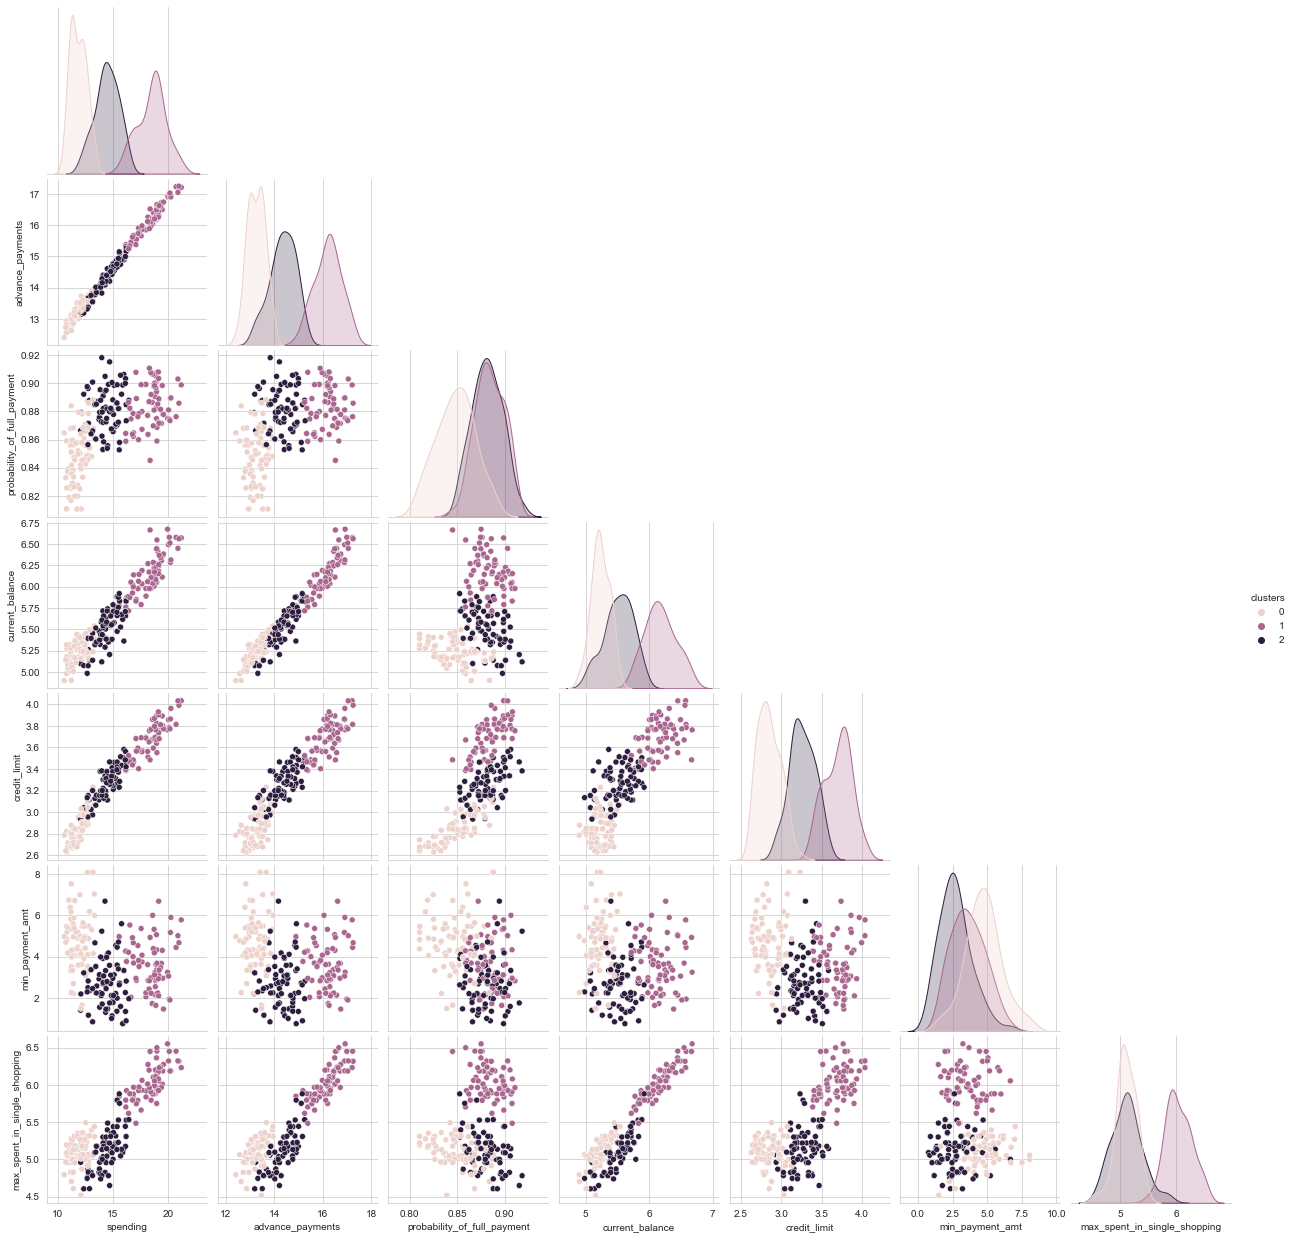

In [147]:
plt.figure(figsize=(50,50))
sns.pairplot(kmea,hue= 'clusters',corner=True);

plt.show();

## 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.



In [45]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
kmea=df.copy()
kmea["clusters"] = k_means.labels_
kmea.head()


,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,0
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [46]:
kmea.groupby('clusters').mean().T

clusters,0,1,2
spending,11.856944,18.495373,14.437887
advance_payments,13.247778,16.203433,14.337746
probability_of_full_payment,0.848330,0.884210,0.881597
current_balance,5.231750,6.175687,5.514577
credit_limit,2.849542,3.697537,3.259225
min_payment_amt,4.733892,3.632373,2.707341
max_spent_in_single_shopping,5.101722,6.041701,5.120803


In [47]:
kmea.groupby('clusters').describe().T

clusters                                    0          1          2
spending                     count  72.000000  67.000000  71.000000
                             mean   11.856944  18.495373  14.437887
                             std     0.714801   1.277122   1.056513
                             min    10.590000  15.560000  12.080000
                             25%    11.255000  17.590000  13.820000
                             50%    11.825000  18.750000  14.430000
                             75%    12.395000  19.145000  15.260000
                             max    13.340000  21.180000  16.440000
advance_payments             count  72.000000  67.000000  71.000000
                             mean   13.247778  16.203433  14.337746
                             std     0.355208   0.546439   0.525706
                             min    12.410000  14.890000  13.150000
                             25%    12.992500  15.855000  14.030000
                             50%    13.250000  16.230000  14.390000
                             75%    13.482500  16.580000  14.760000
                             max    13.950000  17.250000  15.270000
probability_of_full_payment  count  72.000000  67.000000  71.000000
                             mean    0.848330   0.884210   0.881597
                             std     0.019800   0.014917   0.015502
                             min     0.810588   0.845200   0.852700
                             25%     0.835000   0.874650   0.871300
                             50%     0.848600   0.882900   0.881900
                             75%     0.861475   0.898050   0.893350
                             max     0.888300   0.910800   0.918300
current_balance              count  72.000000  67.000000  71.000000
                             mean    5.231750   6.175687   5.514577
                             std     0.141795   0.237807   0.225266
                             min     4.899000   5.718000   4.984000
                             25%     5.139250   6.011500   5.380000
                             50%     5.225000   6.153000   5.541000
                             75%     5.337250   6.328000   5.689500
                             max     5.541000   6.675000   5.920000
credit_limit                 count  72.000000  67.000000  71.000000
                             mean    2.849542   3.697537   3.259225
                             std     0.138689   0.166014   0.154766
                             min     2.630000   3.387000   2.936000
                             25%     2.738500   3.564500   3.155000
                             50%     2.836500   3.719000   3.258000
                             75%     2.967000   3.808000   3.378000
                             max     3.232000   4.033000   3.582000
min_payment_amt              count  72.000000  67.000000  71.000000
                             mean    4.733892   3.632373   2.707341
                             std     1.332248   1.211052   1.176440
                             min     1.502000   1.472000   0.765100
                             25%     4.032250   2.848000   1.951000
                             50%     4.799000   3.619000   2.640000
                             75%     5.463750   4.421000   3.332000
                             max     8.079625   6.682000   6.685000
max_spent_in_single_shopping count  72.000000  67.000000  71.000000
                             mean    5.101722   6.041701   5.120803
                             std     0.184012   0.229566   0.269558
                             min     4.519000   5.484000   4.605000
                             25%     5.001000   5.879000   4.958500
                             50%     5.089000   6.009000   5.132000
                             75%     5.223500   6.192500   5.263500
                             max     5.491000   6.550000   5.879000

### KMeans Group Profile

Group 0 - Has lowest values in spending,advance payments,current balance,probability of full payment ,current balance,credit limit and max xspent in single shopping. High in minimum payment amount.

Group 1 - Has highest values in spending,advance payments,current balance,probability of full payment ,current balance,credit limit and max spent in single shopping. Second highest value in minimum payment amount.

Group 2 - Has second highest values in spending,advance payments,current balance,probability of full payment ,current balance,credit limit and max spent in single shopping. Lowest value in minimum payment amount.


In [48]:
fcl=df.copy()
clusters = fcluster(link_ward, 3, criterion='maxclust')
fcl["clusters"] = clusters
fcl.groupby('clusters').mean().T

clusters,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848155,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.940302,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178


### Fcluster Group Profile

Group 1 - Has highest values in spending,advance payments,current balance,probability of full payment ,current balance,credit limit and max spent in single shopping. Second highest value in minimum payment amount.

Group 2 - Has lowest values in spending,advance payments,current balance,probability of full payment ,current balance,credit limit . High in minimum payment amount and second highest value in max spent in single shopping.

Group 3 - Has second highest values in spending,advance payments,current balance,probability of full payment ,current balance,credit limit. Lowest value in minimum payment amount and max spent in single shopping.


In [49]:
fcl.groupby('clusters').describe().T

clusters                                    1          2          3
spending                     count  70.000000  67.000000  73.000000
                             mean   18.371429  11.872388  14.199041
                             std     1.381233   0.735848   1.230930
                             min    15.380000  10.590000  11.230000
                             25%    17.330000  11.250000  13.500000
                             50%    18.720000  11.830000  14.330000
                             75%    19.137500  12.450000  15.030000
                             max    21.180000  13.370000  16.630000
advance_payments             count  70.000000  67.000000  73.000000
                             mean   16.145429  13.257015  14.233562
                             std     0.599277   0.353348   0.600399
                             min    14.860000  12.410000  12.630000
                             25%    15.737500  13.000000  13.850000
                             50%    16.210000  13.270000  14.280000
                             75%    16.557500  13.520000  14.670000
                             max    17.250000  13.950000  15.460000
probability_of_full_payment  count  70.000000  67.000000  73.000000
                             mean    0.884400   0.848155   0.879190
                             std     0.014767   0.020150   0.017373
                             min     0.845200   0.810588   0.833500
                             25%     0.874700   0.834400   0.868000
                             50%     0.883950   0.849100   0.879600
                             75%     0.898225   0.861100   0.892300
                             max     0.910800   0.888300   0.918300
current_balance              count  70.000000  67.000000  73.000000
                             mean    6.158171   5.238940   5.478233
                             std     0.245926   0.136087   0.240882
                             min     5.709000   4.899000   4.902000
                             25%     5.979250   5.142500   5.351000
                             50%     6.148500   5.236000   5.504000
                             75%     6.312000   5.329000   5.658000
                             max     6.675000   5.541000   6.053000
credit_limit                 count  70.000000  67.000000  73.000000
                             mean    3.684629   2.848537   3.226452
                             std     0.174909   0.142565   0.179454
                             min     3.268000   2.630000   2.719000
                             25%     3.554250   2.731000   3.129000
                             50%     3.693500   2.833000   3.221000
                             75%     3.804750   2.967000   3.371000
                             max     4.033000   3.232000   3.582000
min_payment_amt              count  70.000000  67.000000  73.000000
                             mean    3.639157   4.940302   2.612181
                             std     1.208271   1.144279   1.118413
                             min     1.472000   3.082000   0.765100
                             25%     2.845500   4.117000   1.791000
                             50%     3.629000   4.857000   2.504000
                             75%     4.459250   5.470500   3.136000
                             max     6.682000   8.079625   6.685000
max_spent_in_single_shopping count  70.000000  67.000000  73.000000
                             mean    6.017371   5.122209   5.086178
                             std     0.251132   0.156953   0.275904
                             min     5.443000   4.794000   4.519000
                             25%     5.877000   5.002000   4.872000
                             50%     5.981500   5.091000   5.097000
                             75%     6.187750   5.247000   5.220000
                             max     6.550000   5.491000   5.879000

THe groups in hierarchical clustering(fcluster) is identified as

--> Group 1-High spending group,Group 2=Low spending group ,Group 3- Medium spending group



### Promotional Strategies based on FCluster

### Group 1 - High Spenders 

#### It has the highest current balance so new credit cards can be offered to this group

#### It has high probability of full payment and advance payment so loan can be given against credit cards to earn interests.

#### We can also increase their credit limits as they are having highest probability of full payment .


### Group 2 - Low Spenders 

#####  We can give reward points for their loan repayments since this group of customers has lowest spending, advance payment ,lowest probability of full payment & least Credit limit  among all.

##### We can offer insurance so that they can save their income tax  to increase current balance

##### We can send them reminders for their loan repayments since the probability of full payment is low.

##### Since these Customers are having lowest spending habits we can provide tie up link their municipality tax, electricity bills,gas bills,groceries . 

### Group 3 - Medium Spenders 

#### We can also offer vouchers and gifts to increase their spending and maximum spending in one purchase. This can be done to move them to Group 1.

#### We can tie them up with popular brands to increase their spending.

#### The minimum payment amount is lowest among all 3 groups so we can offer a significant discount for making full payment.


# Problem 2: CART-RF-ANN

 An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.



## 2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


In [51]:
df1=pd.read_csv('insurance_part2_data.csv')
df1.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [52]:
df1.shape

(3000, 10)

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [54]:
df1.dtypes

Age               int64
Agency_Code      object
Type             object
Claimed          object
Commision       float64
Channel          object
Duration          int64
Sales           float64
Product Name     object
Destination      object
dtype: object

In [55]:
df1.describe(include='all')


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [56]:
df1.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

### Treating duplicates and bad data

In [57]:
print('There are',df1.duplicated().sum(),'duplicates in this dataset')


There are 139 duplicates in this dataset


In [58]:
df1.drop_duplicates(inplace=True)
print('After dropping duplicates there are',df1.duplicated().sum(),'duplicates in this dataset')


After dropping duplicates there are 0 duplicates in this dataset


In [59]:
df1[df1['Duration']==-1]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
1508,25,JZI,Airlines,No,6.3,Online,-1,18.0,Bronze Plan,ASIA


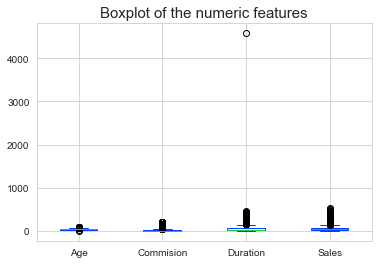

In [60]:
df1.plot(kind='box')
plt.title('Boxplot of the numeric features',fontsize=15);

It has outliers so impute the bad data with median

In [61]:
df1['Duration'].median()


28.0

In [62]:
df1['Duration'] = df1['Duration'].replace(to_replace=-1, value=df1['Duration'].median())
df1.loc[1508]

Age                      25
Agency_Code             JZI
Type               Airlines
Claimed                  No
Commision               6.3
Channel              Online
Duration                 28
Sales                  18.0
Product Name    Bronze Plan
Destination            ASIA
Name: 1508, dtype: object

In [63]:
df1[(df1['Sales']==0)].shape

(52, 10)

In [64]:
df1[(df1['Sales']==0)].head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
131,53,JZI,Airlines,No,12.95,Online,93,0.0,Bronze Plan,ASIA
162,36,EPX,Travel Agency,No,0.00,Online,2,0.0,Customised Plan,ASIA
323,54,CWT,Travel Agency,No,100.98,Online,18,0.0,Customised Plan,Americas
483,44,CWT,Travel Agency,No,11.88,Online,10,0.0,Customised Plan,ASIA
513,31,CWT,Travel Agency,No,83.16,Online,99,0.0,Customised Plan,EUROPE


In [65]:
df1['Sales'] = df1['Sales'].replace(to_replace=0, value=df1['Sales'].median())


In [66]:
df1.shape

(2861, 10)

In [67]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2861 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           2861 non-null   int64  
 1   Agency_Code   2861 non-null   object 
 2   Type          2861 non-null   object 
 3   Claimed       2861 non-null   object 
 4   Commision     2861 non-null   float64
 5   Channel       2861 non-null   object 
 6   Duration      2861 non-null   int64  
 7   Sales         2861 non-null   float64
 8   Product Name  2861 non-null   object 
 9   Destination   2861 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 310.4+ KB


In [68]:
df1.describe()

,Age,Commision,Duration,Sales
count,2861.000000,2861.000000,2861.000000,2861.000000
mean,38.204124,15.080996,72.130374,62.366756
std,10.678106,25.826834,135.972828,71.012142
min,8.000000,0.000000,0.000000,0.190000
25%,31.000000,0.000000,12.000000,21.000000
50%,36.000000,5.630000,28.000000,33.500000
75%,43.000000,17.820000,66.000000,69.300000
max,84.000000,210.210000,4580.000000,539.000000


### Univariate Analysis

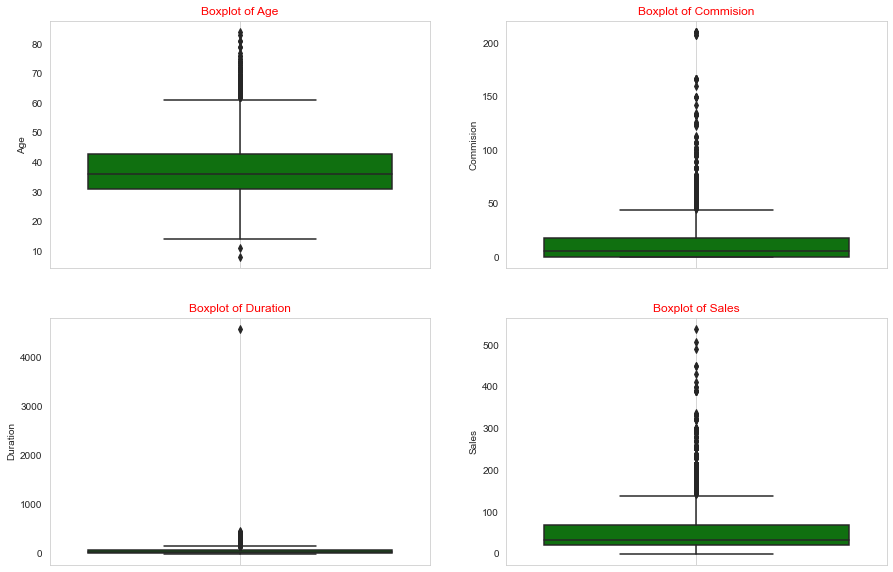

In [69]:
df_num = df1.select_dtypes(include = ['float64', 'int64'])

fig=plt.figure(figsize=(15,10))
for i in range(0,len(df_num.columns)):
    ax=fig.add_subplot(2,2,i+1)
    sns.boxplot(y=df_num[df_num.columns[i]],color='g')
    ax.set_title('Boxplot of '+df_num.columns[i],color='Red')
    plt.grid()



In [70]:
def proportion_outlier2(column):
    Q1=df_num[column].quantile(q=0.25)
    Q3=df_num[column].quantile(q=0.75)
    IQR=stats.iqr(df_num[column])   
    
    L_outlier=Q1-1.5*(Q3-Q1)
    U_outlier=Q3+1.5*(Q3-Q1)
    print('Lower outliers in ' +column+ ' is : ', L_outlier)
    print('Upper outliers in ' +column+ ' is : ', U_outlier)
    print('Number of outliers in '+column + ' upper : ', df_num[df_num[column]>U_outlier][column].count())
    print('Number of outliers in '+column + ' lower : ', df_num[df_num[column]<L_outlier][column].count())
    print('% of Outlier in '+column + ' upper: ',round(df_num[df_num[column]>U_outlier][column].count()*100/len(df_num)), '%')
    print('% of Outlier in '+column + ' lower: ',round(df_num[df_num[column]<L_outlier][column].count()*100/len(df_num)), '%')
    print('-----------------------------------------------------')



In [71]:
lstnumericcolumns2 = list(df_num.columns.values)

for x in lstnumericcolumns2:
    proportion_outlier2(x)


Lower outliers in Age is :  13.0
Upper outliers in Age is :  61.0
Number of outliers in Age upper :  128
Number of outliers in Age lower :  2
% of Outlier in Age upper:  4 %
% of Outlier in Age lower:  0 %
-----------------------------------------------------
Lower outliers in Commision is :  -26.73
Upper outliers in Commision is :  44.55
Number of outliers in Commision upper :  354
Number of outliers in Commision lower :  0
% of Outlier in Commision upper:  12 %
% of Outlier in Commision lower:  0 %
-----------------------------------------------------
Lower outliers in Duration is :  -69.0
Upper outliers in Duration is :  147.0
Number of outliers in Duration upper :  362
Number of outliers in Duration lower :  0
% of Outlier in Duration upper:  13 %
% of Outlier in Duration lower:  0 %
-----------------------------------------------------
Lower outliers in Sales is :  -51.44999999999999
Upper outliers in Sales is :  141.75
Number of outliers in Sales upper :  347
Number of outliers i

In [72]:
from scipy import stats
df_obj = df1.select_dtypes(include = ['object'])

def univariateAnalysis_obj(column):
    print("Value Count of " + column)
    print("----------------------------------------------------------------------------")
    print(df1[column].value_counts(),end='\n\n')

    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df1[column].describe(),end='\n\n')
    
    
    plt.figure()
    print("Countplot of " + column)
    print("----------------------------------------------------------------------------")
    sns.countplot(x=df1[column]);
    plt.xticks(rotation=45)
    
    
    plt.show()


Value Count of Agency_Code
----------------------------------------------------------------------------
EPX    1238
C2B     913
CWT     471
JZI     239
Name: Agency_Code, dtype: int64

Description of Agency_Code
----------------------------------------------------------------------------
count     2861
unique       4
top        EPX
freq      1238
Name: Agency_Code, dtype: object

Countplot of Agency_Code
----------------------------------------------------------------------------


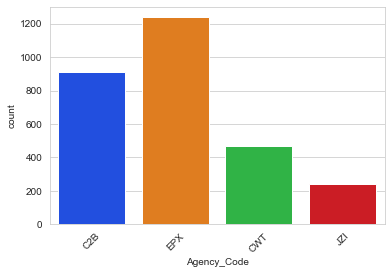

Value Count of Type
----------------------------------------------------------------------------
Travel Agency    1709
Airlines         1152
Name: Type, dtype: int64

Description of Type
----------------------------------------------------------------------------
count              2861
unique                2
top       Travel Agency
freq               1709
Name: Type, dtype: object

Countplot of Type
----------------------------------------------------------------------------


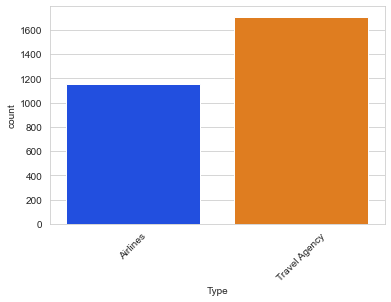

Value Count of Claimed
----------------------------------------------------------------------------
No     1947
Yes     914
Name: Claimed, dtype: int64

Description of Claimed
----------------------------------------------------------------------------
count     2861
unique       2
top         No
freq      1947
Name: Claimed, dtype: object

Countplot of Claimed
----------------------------------------------------------------------------


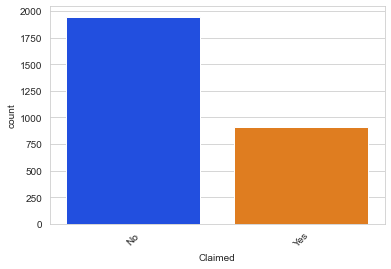

Value Count of Channel
----------------------------------------------------------------------------
Online     2815
Offline      46
Name: Channel, dtype: int64

Description of Channel
----------------------------------------------------------------------------
count       2861
unique         2
top       Online
freq        2815
Name: Channel, dtype: object

Countplot of Channel
----------------------------------------------------------------------------


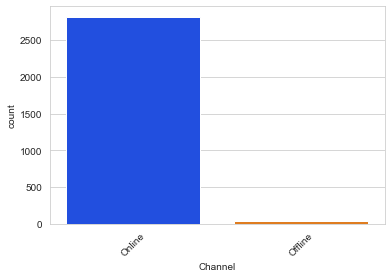

Value Count of Product Name
----------------------------------------------------------------------------
Customised Plan      1071
Bronze Plan           645
Cancellation Plan     615
Silver Plan           421
Gold Plan             109
Name: Product Name, dtype: int64

Description of Product Name
----------------------------------------------------------------------------
count                2861
unique                  5
top       Customised Plan
freq                 1071
Name: Product Name, dtype: object

Countplot of Product Name
----------------------------------------------------------------------------


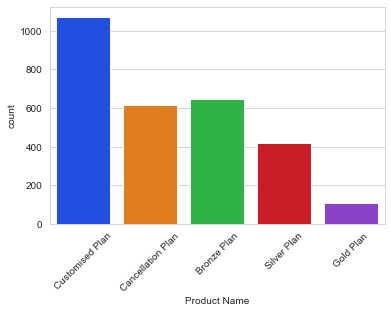

Value Count of Destination
----------------------------------------------------------------------------
ASIA        2327
Americas     319
EUROPE       215
Name: Destination, dtype: int64

Description of Destination
----------------------------------------------------------------------------
count     2861
unique       3
top       ASIA
freq      2327
Name: Destination, dtype: object

Countplot of Destination
----------------------------------------------------------------------------


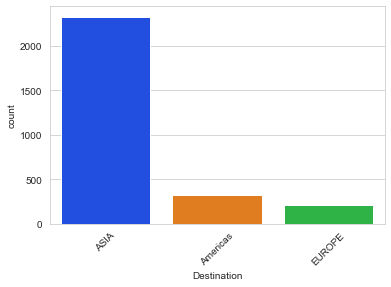

In [73]:
lstobjcolumns = list(df_obj.columns.values)
for x in lstobjcolumns:
    univariateAnalysis_obj(x)


Description of Age
----------------------------------------------------------------------------
count    2861.000000
mean       38.204124
std        10.678106
min         8.000000
25%        31.000000
50%        36.000000
75%        43.000000
max        84.000000
Name: Age, dtype: float64

Interquartile range (IQR) of is  12.0
Range of values:  76 

Distribution of Age
----------------------------------------------------------------------------


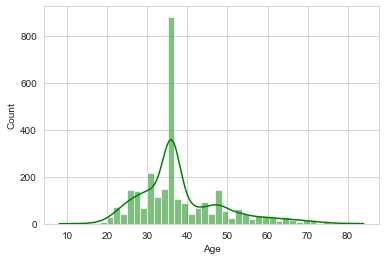

Description of Commision
----------------------------------------------------------------------------
count    2861.000000
mean       15.080996
std        25.826834
min         0.000000
25%         0.000000
50%         5.630000
75%        17.820000
max       210.210000
Name: Commision, dtype: float64

Interquartile range (IQR) of is  17.82
Range of values:  210.21 

Distribution of Commision
----------------------------------------------------------------------------


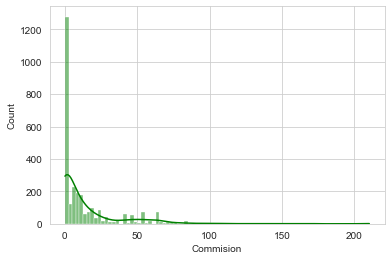

Description of Duration
----------------------------------------------------------------------------
count    2861.000000
mean       72.130374
std       135.972828
min         0.000000
25%        12.000000
50%        28.000000
75%        66.000000
max      4580.000000
Name: Duration, dtype: float64

Interquartile range (IQR) of is  54.0
Range of values:  4580 

Distribution of Duration
----------------------------------------------------------------------------


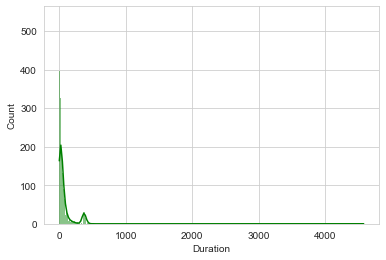

Description of Sales
----------------------------------------------------------------------------
count    2861.000000
mean       62.366756
std        71.012142
min         0.190000
25%        21.000000
50%        33.500000
75%        69.300000
max       539.000000
Name: Sales, dtype: float64

Interquartile range (IQR) of is  48.3
Range of values:  538.81 

Distribution of Sales
----------------------------------------------------------------------------


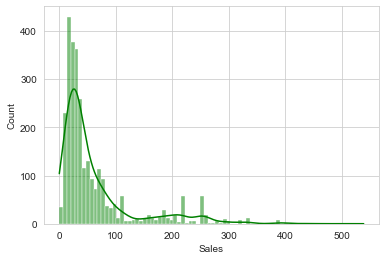

In [74]:

def univariateAnalysis_numeric2(column):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df1[column].describe(),end='\n\n')
    print('Interquartile range (IQR) of is ', round(stats.iqr(df1[column]),3))
    print('Range of values: ', round(df1[column].max()-df1[column].min(),3),"\n")
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.histplot(df1[column], kde=True, color='g');
    plt.show()

lstnumericcolumns2 = list(df_num.columns.values)
for x in lstnumericcolumns2:
    univariateAnalysis_numeric2(x)


In [75]:
for columns in df_num.columns:
    print('Skewness of {} is'.format(columns), round(df_num[columns].skew(),2))
    print('Kurtosis of {} is'.format(columns), round(df_num[columns].kurt(),2))


Skewness of Age is 1.1
Kurtosis of Age is 1.44
Skewness of Commision is 3.1
Kurtosis of Commision is 13.59
Skewness of Duration is 13.79
Kurtosis of Duration is 422.68
Skewness of Sales is 2.37
Kurtosis of Sales is 6.07


### Bivariate Analysis

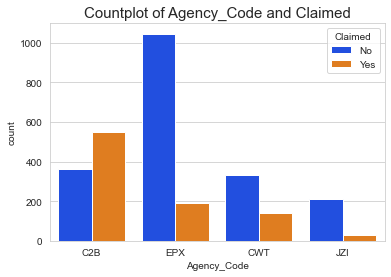

In [76]:
sns.countplot(x=df1["Agency_Code"],hue=df1["Claimed"]); 
plt.title('Countplot of Agency_Code and Claimed',fontsize=15);


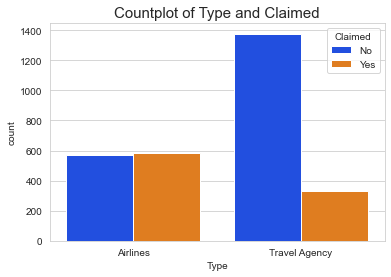

In [77]:
sns.countplot(x=df1["Type"],hue=df1["Claimed"]);
plt.title('Countplot of Type and Claimed',fontsize=15);


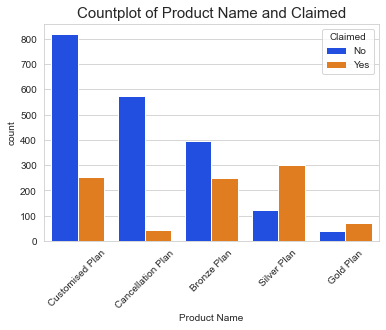

In [78]:
sns.countplot(x=df1["Product Name"],hue=df1["Claimed"]);
plt.title('Countplot of Product Name and Claimed',fontsize=15);
plt.xticks(rotation=45);


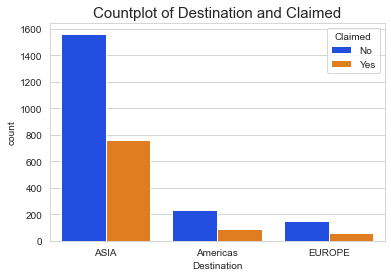

In [79]:
sns.countplot(x=df1["Destination"],hue=df1["Claimed"]); 
plt.title('Countplot of Destination and Claimed',fontsize=15);


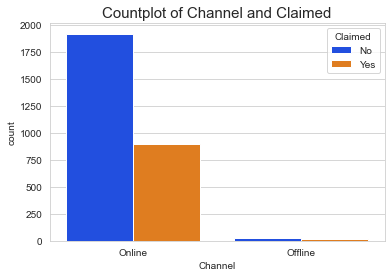

In [80]:
sns.countplot(x=df1["Channel"],hue=df1["Claimed"]);
plt.title('Countplot of Channel and Claimed',fontsize=15);


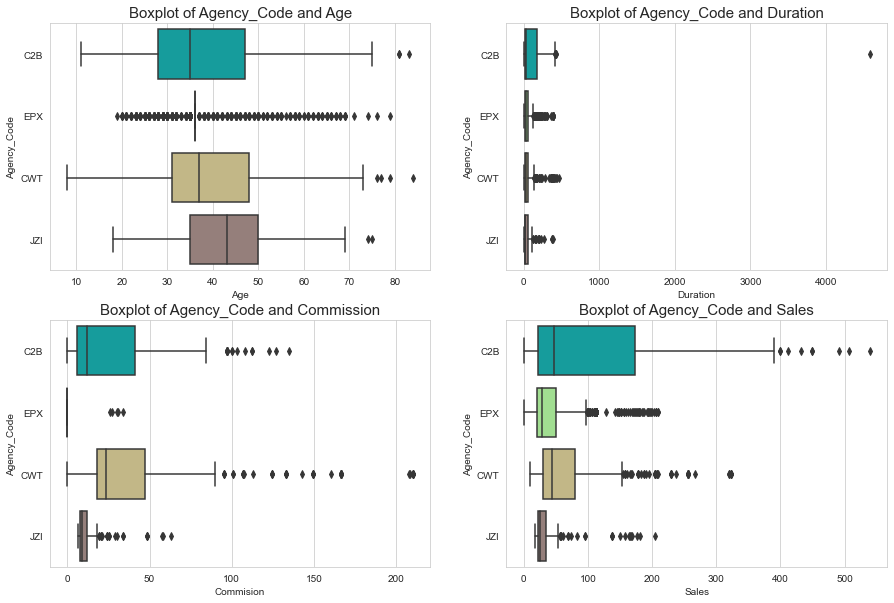

In [81]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(y='Agency_Code', x='Age', data=df1, palette='terrain')
plt.title('Boxplot of Agency_Code and Age',fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(y='Agency_Code', x='Duration', data=df1, palette='terrain')
plt.title('Boxplot of Agency_Code and Duration',fontsize=15)

plt.subplot(2,2,3)
sns.boxplot(y='Agency_Code', x='Commision', data=df1, palette='terrain')
plt.title('Boxplot of Agency_Code and Commission',fontsize=15)

plt.subplot(2,2,4)
sns.boxplot(y='Agency_Code', x='Sales', data=df1, palette='terrain')
plt.title('Boxplot of Agency_Code and Sales',fontsize=15);


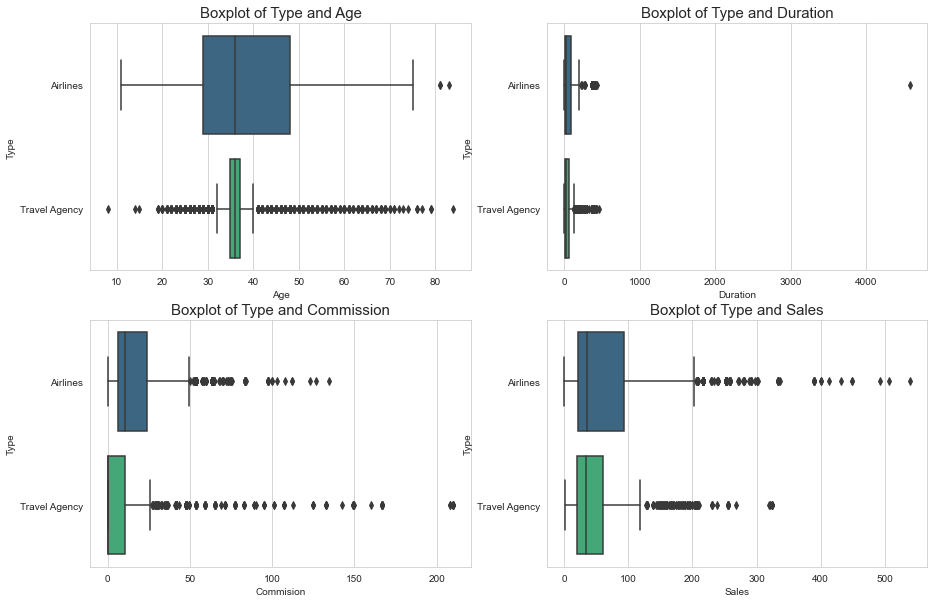

In [82]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(y='Type', x='Age', data=df1, palette='viridis')
plt.title('Boxplot of Type and Age',fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(y='Type', x='Duration', data=df1, palette='viridis')
plt.title('Boxplot of Type and Duration',fontsize=15)

plt.subplot(2,2,3)
sns.boxplot(y='Type', x='Commision', data=df1, palette='viridis')
plt.title('Boxplot of Type and Commission',fontsize=15)

plt.subplot(2,2,4)
sns.boxplot(y='Type', x='Sales', data=df1, palette='viridis')
plt.title('Boxplot of Type and Sales',fontsize=15);


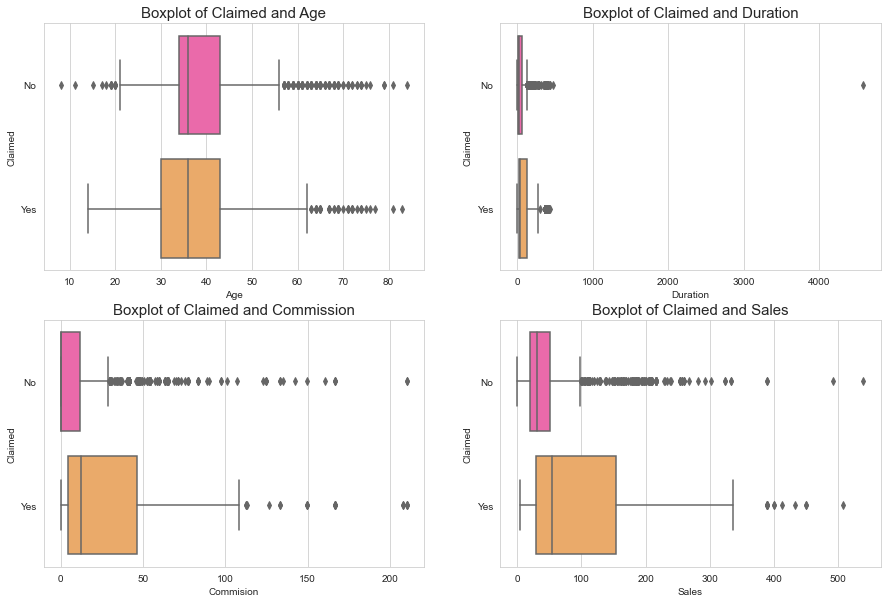

In [83]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(y='Claimed', x='Age', data=df1, palette='spring')
plt.title('Boxplot of Claimed and Age',fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(y='Claimed', x='Duration', data=df1, palette='spring')
plt.title('Boxplot of Claimed and Duration',fontsize=15)

plt.subplot(2,2,3)
sns.boxplot(y='Claimed', x='Commision', data=df1, palette='spring')
plt.title('Boxplot of Claimed and Commission',fontsize=15)

plt.subplot(2,2,4)
sns.boxplot(y='Claimed', x='Sales', data=df1, palette='spring')
plt.title('Boxplot of Claimed and Sales',fontsize=15);


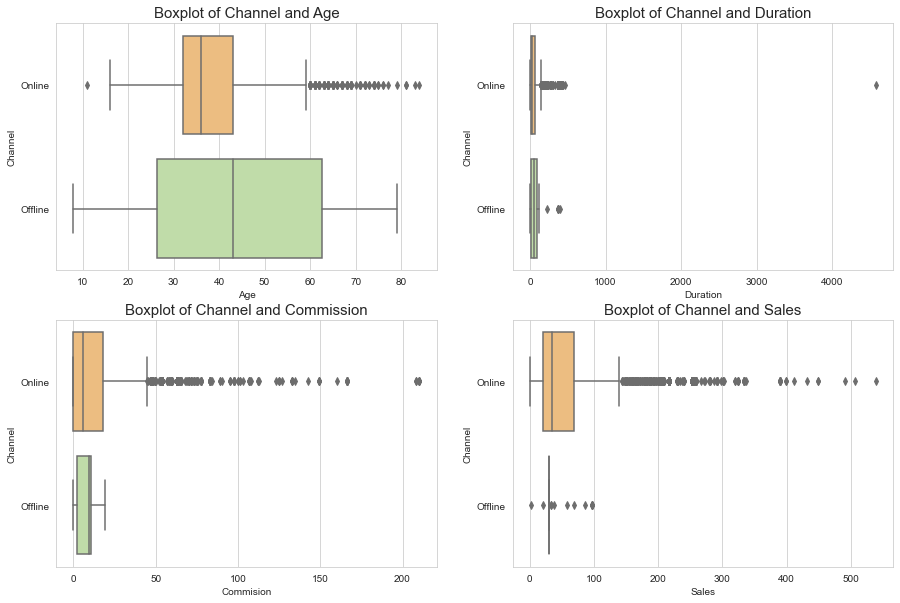

In [84]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(y='Channel', x='Age', data=df1, palette='Spectral')
plt.title('Boxplot of Channel and Age',fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(y='Channel', x='Duration', data=df1, palette='Spectral')
plt.title('Boxplot of Channel and Duration',fontsize=15)

plt.subplot(2,2,3)
sns.boxplot(y='Channel', x='Commision', data=df1, palette='Spectral')
plt.title('Boxplot of Channel and Commission',fontsize=15)

plt.subplot(2,2,4)
sns.boxplot(y='Channel', x='Sales', data=df1, palette='Spectral')
plt.title('Boxplot of Channel and Sales',fontsize=15);


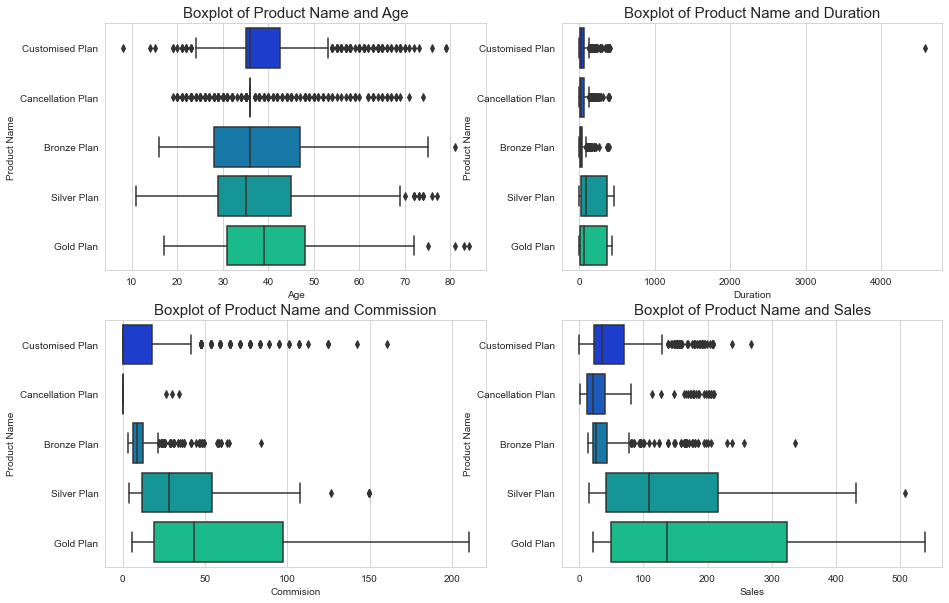

In [85]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(y='Product Name', x='Age', data=df1, palette='winter')
plt.title('Boxplot of Product Name and Age',fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(y='Product Name', x='Duration', data=df1, palette='winter')
plt.title('Boxplot of Product Name and Duration',fontsize=15)

plt.subplot(2,2,3)
sns.boxplot(y='Product Name', x='Commision', data=df1, palette='winter')
plt.title('Boxplot of Product Name and Commission',fontsize=15)

plt.subplot(2,2,4)
sns.boxplot(y='Product Name', x='Sales', data=df1, palette='winter')
plt.title('Boxplot of Product Name and Sales',fontsize=15);


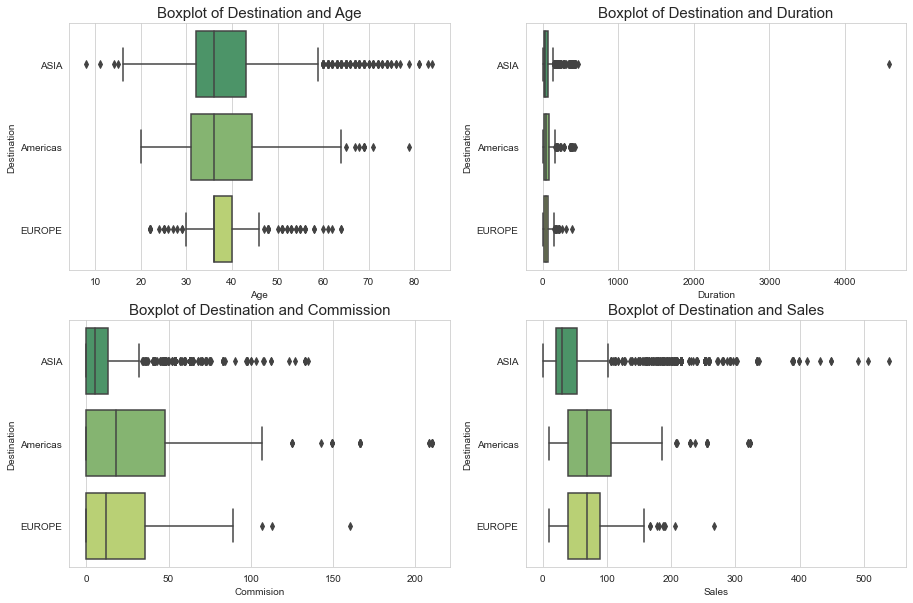

In [86]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.boxplot(y='Destination', x='Age', data=df1, palette='summer')
plt.title('Boxplot of Destination and Age',fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(y='Destination', x='Duration', data=df1, palette='summer')
plt.title('Boxplot of Destination and Duration',fontsize=15)

plt.subplot(2,2,3)
sns.boxplot(y='Destination', x='Commision', data=df1, palette='summer')
plt.title('Boxplot of Destination and Commission',fontsize=15)

plt.subplot(2,2,4)
sns.boxplot(y='Destination', x='Sales', data=df1, palette='summer')
plt.title('Boxplot of Destination and Sales',fontsize=15);


                Pairplot


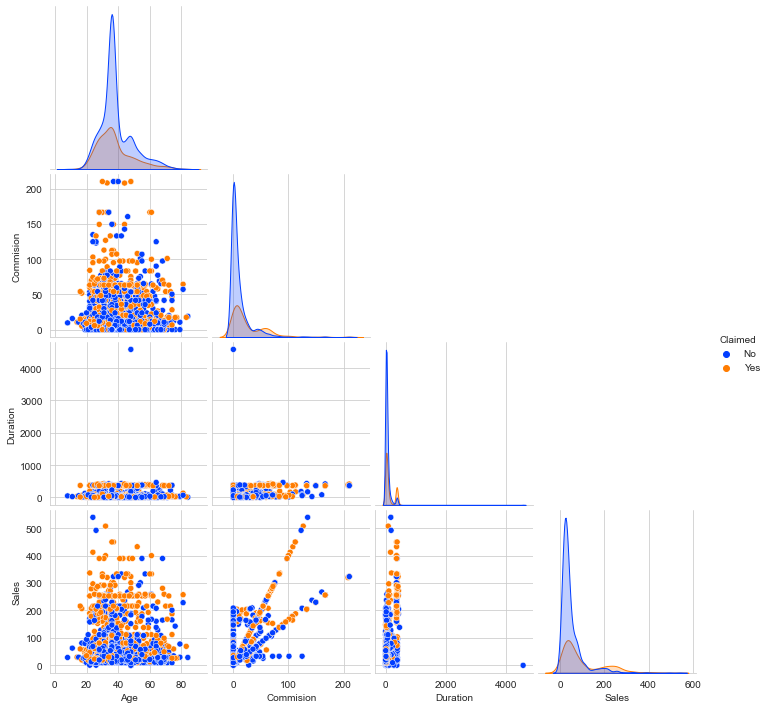

In [87]:
print('                Pairplot')
sns.pairplot(df1, corner=True, hue='Claimed');


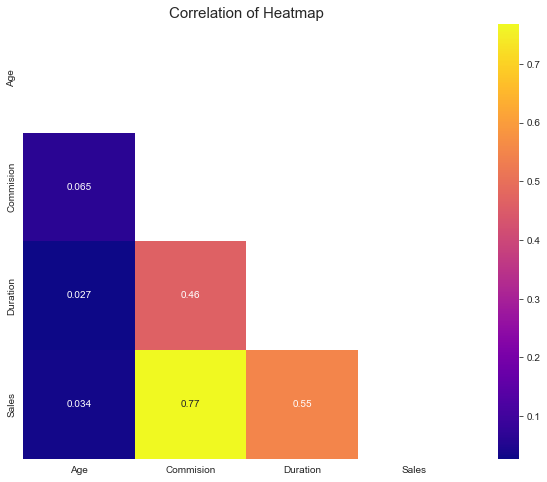

In [88]:
corr=df_num.corr()
mask = np.triu(np.ones_like(corr)) 
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True,cmap='plasma',mask=mask);
plt.title('Correlation of Heatmap',fontsize=15);


### Multivariate Analysis

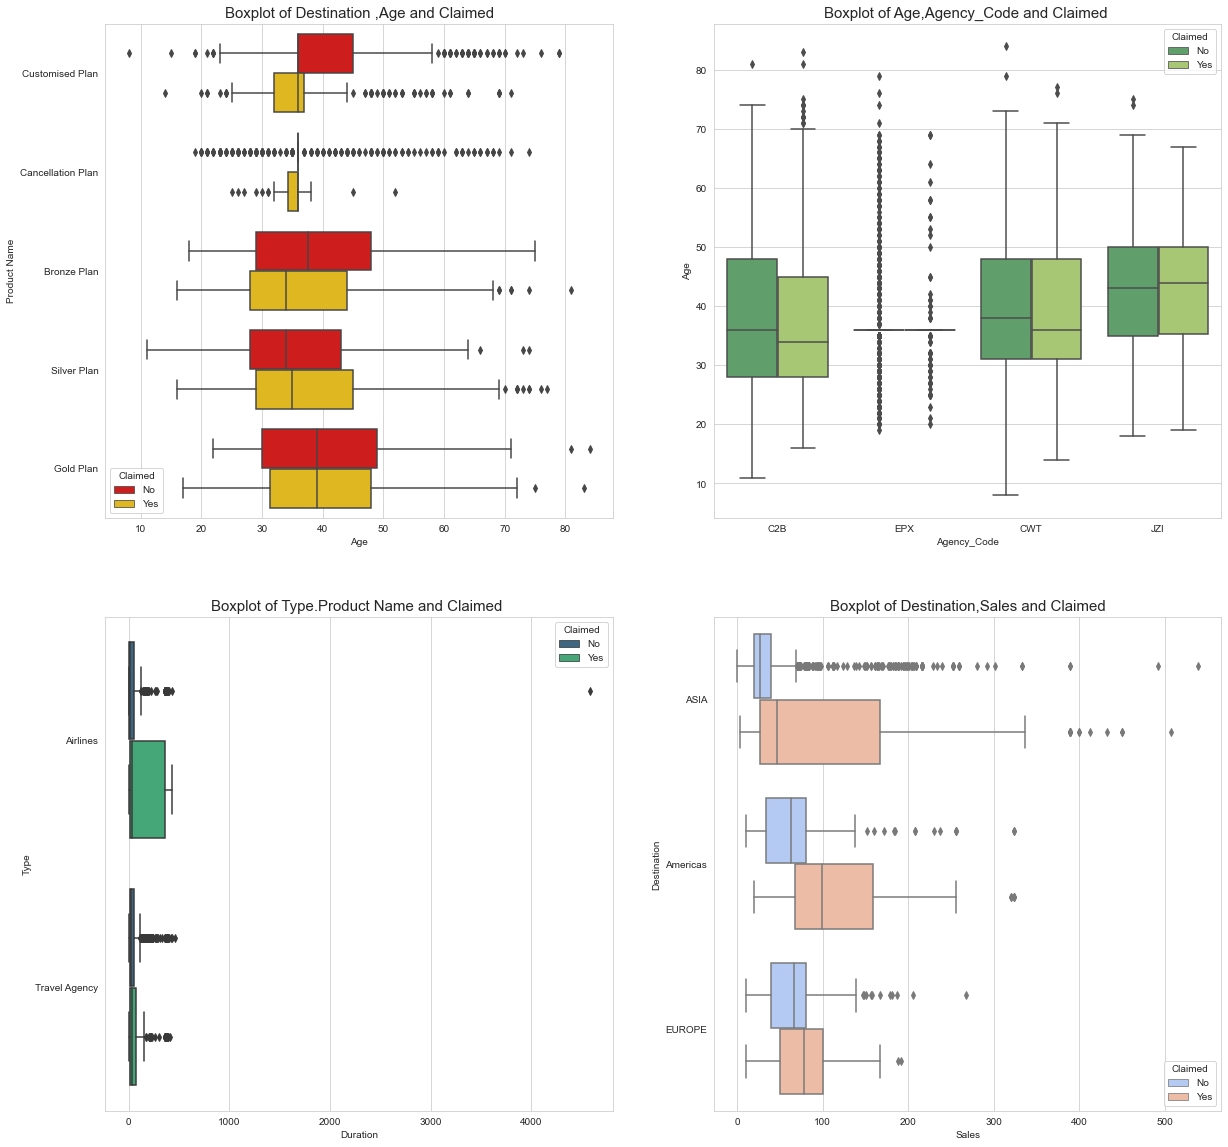

In [89]:
plt.figure(figsize=(20,20))

plt.subplot(2,2,1)
sns.boxplot(y='Product Name', x='Age', hue='Claimed', data=df1, palette='hot')
plt.title('Boxplot of Destination ,Age and Claimed',fontsize=15)

plt.subplot(2,2,2)
sns.boxplot(y='Age', x='Agency_Code',hue='Claimed', data=df1, palette='summer')
plt.title('Boxplot of Age,Agency_Code and Claimed ',fontsize=15)

plt.subplot(2,2,3)
sns.boxplot(y='Type', x='Duration',hue='Claimed', data=df1, palette='viridis')
plt.title('Boxplot of Type.Product Name and Claimed ',fontsize=15)

plt.subplot(2,2,4)
sns.boxplot(y='Destination', x='Sales',hue='Claimed', data=df1, palette='coolwarm')
plt.title('Boxplot of Destination,Sales and Claimed',fontsize=15);


## 2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network



### Note:
Decision tree in Python can take only numerical / categorical colums. It cannot take string / object types. So object types are converted into categorical.



In [90]:
df_copy=df1.copy()
for feature in df_copy.columns: 
    if df_copy[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df_copy[feature].unique()))
        print(pd.Categorical(df_copy[feature].unique()).codes)
        df_copy[feature] = pd.Categorical(df_copy[feature]).codes
df_copy.head()



feature: Agency_Code
['C2B', 'EPX', 'CWT', 'JZI']
Categories (4, object): ['C2B', 'CWT', 'EPX', 'JZI']
[0 2 1 3]


feature: Type
['Airlines', 'Travel Agency']
Categories (2, object): ['Airlines', 'Travel Agency']
[0 1]


feature: Claimed
['No', 'Yes']
Categories (2, object): ['No', 'Yes']
[0 1]


feature: Channel
['Online', 'Offline']
Categories (2, object): ['Offline', 'Online']
[1 0]


feature: Product Name
['Customised Plan', 'Cancellation Plan', 'Bronze Plan', 'Silver Plan', 'Gold Plan']
Categories (5, object): ['Bronze Plan', 'Cancellation Plan', 'Customised Plan', 'Gold Plan', 'Silver Plan']
[2 1 0 4 3]


feature: Destination
['ASIA', 'Americas', 'EUROPE']
Categories (3, object): ['ASIA', 'Americas', 'EUROPE']
[0 1 2]


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [91]:
X = df_copy.drop("Claimed" , axis=1)
y = df_copy.pop("Claimed")

from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=1)

In [92]:
train_labels.value_counts(normalize=True)

0    0.678821
1    0.321179
Name: Claimed, dtype: float64

In [93]:
test_labels.value_counts(normalize=True)

0    0.684517
1    0.315483
Name: Claimed, dtype: float64

### CART

In [94]:
dt_model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dt_model.fit(X_train, train_labels)

DecisionTreeClassifier(random_state=1)

In [95]:
from sklearn import tree

train_char_label = ['No', 'Yes']
dt_Tree_File = open('dt_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=dt_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

dt_Tree_File.close()


#### Feature Importance

In [96]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Feature_Imp"], index = X_train.columns).sort_values('Feature_Imp',ascending=False))


              Feature_Imp
Duration         0.276428
Sales            0.227796
Age              0.186292
Agency_Code      0.167396
Commision        0.079261
Product Name     0.028732
Destination      0.024398
Channel          0.005393
Type             0.004303


In [97]:
X_train.shape

(2002, 9)

In [98]:
from sklearn.model_selection import GridSearchCV

param_grid1 = {
    'max_depth': [8, 10, 12],
    'min_samples_leaf': [30, 50, 60],
    'min_samples_split': [60, 100, 150]
}

dt_model = DecisionTreeClassifier()



In [99]:
grid_search1 = GridSearchCV(estimator = dt_model, param_grid = param_grid1, cv = 5)
grid_search1.fit(X_train, train_labels)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [8, 10, 12],
                         'min_samples_leaf': [30, 50, 60],
                         'min_samples_split': [60, 100, 150]})

In [100]:
grid_search1.best_params_

{'max_depth': 8, 'min_samples_leaf': 30, 'min_samples_split': 150}

In [101]:
best_grid1 = grid_search1.best_estimator_
best_grid1

DecisionTreeClassifier(max_depth=8, min_samples_leaf=30, min_samples_split=150)

In [102]:
print (pd.DataFrame(best_grid1.feature_importances_, columns = ["Feature_Imp"], index = X_train.columns).sort_values('Feature_Imp',ascending=False))


              Feature_Imp
Agency_Code      0.553262
Sales            0.271909
Duration         0.059774
Commision        0.046018
Product Name     0.043635
Age              0.025403
Type             0.000000
Channel          0.000000
Destination      0.000000


#### Prediction

In [103]:
ytrain_predict1 = best_grid1.predict(X_train)
ytest_predict1 = best_grid1.predict(X_test)

### Random Forest 

In [104]:
param_grid2 = {
    'max_depth': [8, 10, 12],
    'max_features': [3,4,5],
    'min_samples_leaf': [20, 30, 50, 60],
    'min_samples_split': [60, 100, 150],
    'n_estimators': [100, 200]
}

rfcl_model = RandomForestClassifier()
grid_search2 = GridSearchCV(estimator = rfcl_model, param_grid = param_grid2, cv = 5)
grid_search2.fit(X_train, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [8, 10, 12], 'max_features': [3, 4, 5],
                         'min_samples_leaf': [20, 30, 50, 60],
                         'min_samples_split': [60, 100, 150],
                         'n_estimators': [100, 200]})

In [105]:
grid_search2.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 20,
 'min_samples_split': 100,
 'n_estimators': 100}

In [106]:
best_grid2=grid_search2.best_estimator_
best_grid2

RandomForestClassifier(max_depth=10, max_features=5, min_samples_leaf=20,
                       min_samples_split=100)

In [107]:
print (pd.DataFrame(best_grid2.feature_importances_, columns = ["Feature_Imp"], index = X_train.columns).sort_values('Feature_Imp',ascending=False))


              Feature_Imp
Agency_Code      0.364614
Product Name     0.204938
Sales            0.188238
Commision        0.097997
Duration         0.064678
Age              0.037333
Type             0.032653
Destination      0.009472
Channel          0.000077


#### Predictions

In [108]:
ytrain_predict2 = best_grid2.predict(X_train)
ytest_predict2 = best_grid2.predict(X_test)

### Artificial Neural Network

#### Scaling

In [109]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
X_train_sc = sc.fit_transform(X_train) 
X_test_sc = sc.transform (X_test)
X_test_sc

array([[-0.68701032, -0.27289013,  0.83463176, ...,  0.50264304,
         0.24339146, -0.44775345],
       [ 2.79357258,  0.71683095,  0.83463176, ..., -0.46611137,
        -0.53499465, -0.44775345],
       [ 0.34775757, -1.2626112 , -1.19813318, ...,  0.31743999,
         1.80016368, -0.44775345],
       ...,
       [ 1.19438584, -1.2626112 , -1.19813318, ..., -0.65131442,
        -1.31338076, -0.44775345],
       [ 1.38252546,  0.71683095,  0.83463176, ..., -0.58008248,
         0.24339146, -0.44775345],
       [-0.21666128,  0.71683095,  0.83463176, ..., -0.58008248,
         0.24339146, -0.44775345]])

#### Grid Search

In [110]:
param_grid3 = {
    'hidden_layer_sizes': [(6)],
    'activation': ['logistic', 'relu'],
    'solver': ['sgd', 'adam'],
    'tol': [0.0001,0.01,0.001],
    'max_iter' : [10000]
}

mlp_model = MLPClassifier()

grid_search3 = GridSearchCV(estimator = mlp_model, param_grid = param_grid3, cv = 5)
grid_search3.fit(X_train_sc, train_labels)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [6], 'max_iter': [10000],
                         'solver': ['sgd', 'adam'],
                         'tol': [0.0001, 0.01, 0.001]})

In [111]:
grid_search3.best_params_

{'activation': 'logistic',
 'hidden_layer_sizes': 6,
 'max_iter': 10000,
 'solver': 'adam',
 'tol': 0.0001}

In [112]:
best_grid3 = grid_search3.best_estimator_
best_grid3

MLPClassifier(activation='logistic', hidden_layer_sizes=6, max_iter=10000)

#### Predictions

In [113]:
ytrain_predict3 = best_grid3.predict(X_train_sc)
ytest_predict3 = best_grid3.predict(X_test_sc)

## 2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 


### CART

#### Classification Report

In [114]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(train_labels,ytrain_predict1))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1359
           1       0.71      0.53      0.61       643

    accuracy                           0.78      2002
   macro avg       0.75      0.71      0.73      2002
weighted avg       0.77      0.78      0.77      2002



In [115]:
cart_train_classifRepo = classification_report(train_labels,ytrain_predict1,output_dict=True)
cart_train = pd.DataFrame(cart_train_classifRepo).transpose()
cart_train_precision = round(cart_train.loc["1"][0],2)
cart_train_recall = round(cart_train.loc["1"][1],2)
cart_train_f1 = round(cart_train.loc["1"][2],2)
print ('CART Train precision :',cart_train_precision)
print ('CART Train recall : ',cart_train_recall)
print ('CART Train f1 : ',cart_train_f1)


CART Train precision : 0.71
CART Train recall :  0.53
CART Train f1 :  0.61


In [116]:
print(classification_report(test_labels,ytest_predict1))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       588
           1       0.69      0.51      0.58       271

    accuracy                           0.77       859
   macro avg       0.74      0.70      0.71       859
weighted avg       0.76      0.77      0.76       859



In [117]:
cart_test_classifRepo = classification_report(test_labels,ytest_predict1,output_dict=True)
cart_test = pd.DataFrame(cart_test_classifRepo).transpose()
cart_test_precision = round(cart_test.loc["1"][0],2)
cart_test_recall = round(cart_test.loc["1"][1],2)
cart_test_f1 = round(cart_test.loc["1"][2],2)
print ('CART Test precision :',cart_test_precision)
print ('CART Test recall : ',cart_test_recall)
print ('CART Test f1 : ',cart_test_f1)


CART Test precision : 0.69
CART Test recall :  0.51
CART Test f1 :  0.58


#### Confusion Matrix

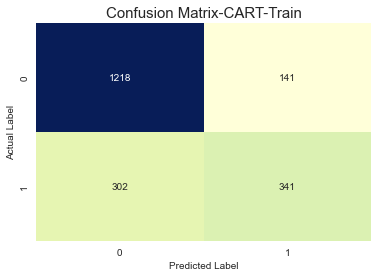

In [118]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-CART-Train',fontsize=15)
plt.show();


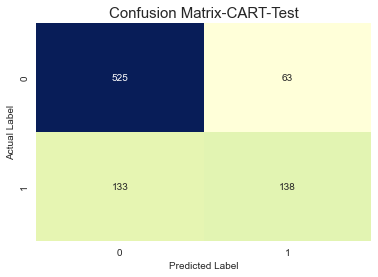

In [119]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict1),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-CART-Test',fontsize=15)
plt.show();


#### Accuracy

In [120]:
cart_train_accu = best_grid1.score(X_train,train_labels)
cart_train_accu

0.7787212787212787

In [121]:
cart_test_accu = best_grid1.score(X_test,test_labels)
cart_test_accu

0.7718277066356228

#### ROC Curve and AUC Score

AUC Score for CART train data: 0.823


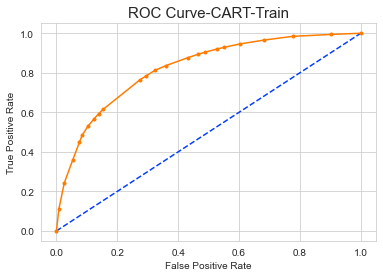

In [122]:
probs = best_grid1.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(train_labels, probs)
print('AUC Score for CART train data: %.3f' % cart_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.')
plt.title('ROC Curve-CART-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC Score for CART test data: 0.778


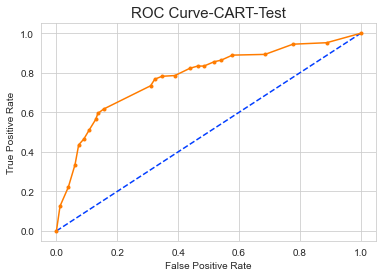

In [123]:
probs = best_grid1.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(test_labels, probs)
print('AUC Score for CART test data: %.3f' % cart_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, cart_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.')
plt.title('ROC Curve-CART-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Random Forest

#### Classification Report

In [124]:
print(classification_report(train_labels,ytrain_predict2))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1359
           1       0.71      0.56      0.63       643

    accuracy                           0.79      2002
   macro avg       0.76      0.73      0.74      2002
weighted avg       0.78      0.79      0.78      2002



In [125]:
rfcl_train_classifRepo = classification_report(train_labels,ytrain_predict2,output_dict=True)
rfcl_train = pd.DataFrame(rfcl_train_classifRepo).transpose()

rfcl_train_precision = round(rfcl_train.loc["1"][0],2)
rfcl_train_recall = round(rfcl_train.loc["1"][1],2)
rfcl_train_f1 = round(rfcl_train.loc["1"][2],2)
print ('Random Forest Train precision :',rfcl_train_precision)
print ('Random Forest Train recall : ',rfcl_train_recall)
print ('Random Forest Train f1 : ',rfcl_train_f1)


Random Forest Train precision : 0.71
Random Forest Train recall :  0.56
Random Forest Train f1 :  0.63


In [126]:
print(classification_report(test_labels,ytest_predict2))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       588
           1       0.70      0.54      0.61       271

    accuracy                           0.78       859
   macro avg       0.75      0.72      0.73       859
weighted avg       0.77      0.78      0.77       859



In [127]:
rfcl_test_classifRepo = classification_report(test_labels,ytest_predict2,output_dict=True)
rfcl_test = pd.DataFrame(rfcl_test_classifRepo).transpose()

rfcl_test_precision = round(rfcl_test.loc["1"][0],2)
rfcl_test_recall = round(rfcl_test.loc["1"][1],2)
rfcl_test_f1 = round(rfcl_test.loc["1"][2],2)
print ('Random Forest Test precision :',rfcl_test_precision)
print ('Random Forest Test recall : ',rfcl_test_recall)
print ('Random Forest Test f1 : ',rfcl_test_f1)


Random Forest Test precision : 0.7
Random Forest Test recall :  0.54
Random Forest Test f1 :  0.61


#### Confusion Matrix

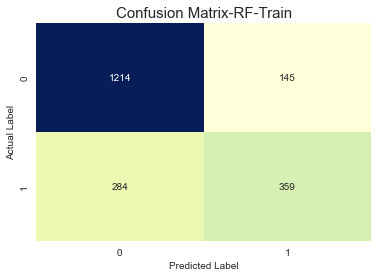

In [128]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-RF-Train',fontsize=15)
plt.show();


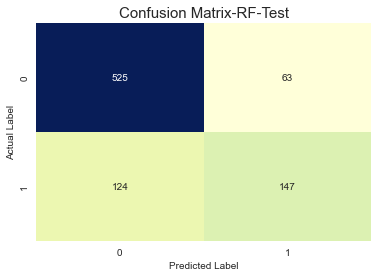

In [129]:
sns.heatmap(confusion_matrix(test_labels, ytest_predict2),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-RF-Test',fontsize=15)
plt.show();


#### Accuracy

In [130]:
rfcl_train_accu = best_grid2.score(X_train,train_labels)
rfcl_train_accu 

0.7857142857142857

In [131]:
rfcl_test_accu = best_grid2.score(X_test,test_labels)
rfcl_test_accu

0.7823050058207218

#### ROC Curve and AUC Score

AUC Score for Random Forest train data: 0.835


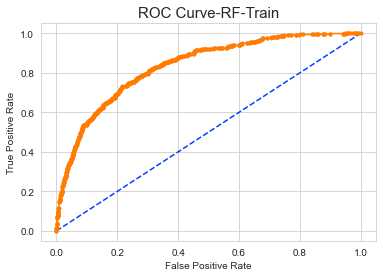

In [132]:
probs = best_grid2.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rfcl_train_auc = roc_auc_score(train_labels, probs)
print('AUC Score for Random Forest train data: %.3f' % rfcl_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rfcl_train_fpr, rfcl_train_tpr, rfcl_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_train_fpr, rfcl_train_tpr, marker='.')
plt.title('ROC Curve-RF-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC Score for Random Forest test data: 0.815


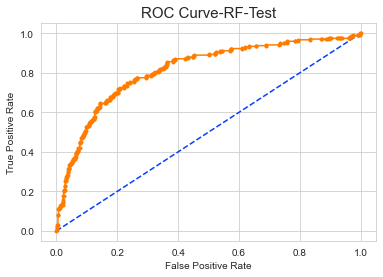

In [133]:
probs = best_grid2.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
rfcl_test_auc = roc_auc_score(test_labels, probs)
print('AUC Score for Random Forest test data: %.3f' % rfcl_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
rfcl_test_fpr, rfcl_test_tpr, rfcl_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(rfcl_test_fpr, rfcl_test_tpr, marker='.')
plt.title('ROC Curve-RF-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

### Artificial Neural Network

#### Classification Report

In [134]:
print(classification_report(train_labels,ytrain_predict3))

              precision    recall  f1-score   support

           0       0.78      0.89      0.84      1359
           1       0.68      0.48      0.56       643

    accuracy                           0.76      2002
   macro avg       0.73      0.69      0.70      2002
weighted avg       0.75      0.76      0.75      2002



In [135]:
ann_train_classifRepo = classification_report(train_labels,ytrain_predict3,output_dict=True)
ann_train = pd.DataFrame(ann_train_classifRepo).transpose()
ann_train_precision = round(ann_train.loc["1"][0],2)
ann_train_recall = round(ann_train.loc["1"][1],2)
ann_train_f1 = round(ann_train.loc["1"][2],2)
print ('Artificial Neural Network Train precision :',ann_train_precision)
print ('Artificial Neural Network Train recall : ',ann_train_recall)
print ('Artificial Neural Network Train f1 : ',ann_train_f1)


Artificial Neural Network Train precision : 0.68
Artificial Neural Network Train recall :  0.48
Artificial Neural Network Train f1 :  0.56


In [136]:
print(classification_report(test_labels,ytest_predict3))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       588
           1       0.69      0.46      0.55       271

    accuracy                           0.76       859
   macro avg       0.74      0.68      0.69       859
weighted avg       0.75      0.76      0.75       859



In [137]:
ann_test_classifRepo = classification_report(test_labels,ytest_predict3,output_dict=True)
ann_test = pd.DataFrame(ann_test_classifRepo).transpose()

ann_test_precision = round(ann_test.loc["1"][0],2)
ann_test_recall = round(ann_test.loc["1"][1],2)
ann_test_f1 = round(ann_test.loc["1"][2],2)
print ('Artificial Neural Network Test precision :',ann_test_precision)
print ('Artificial Neural Network Test recall : ',ann_test_recall)
print ('Artificial Neural Network Test f1 : ',ann_test_f1)


Artificial Neural Network Test precision : 0.69
Artificial Neural Network Test recall :  0.46
Artificial Neural Network Test f1 :  0.55


#### Confusion Matrix

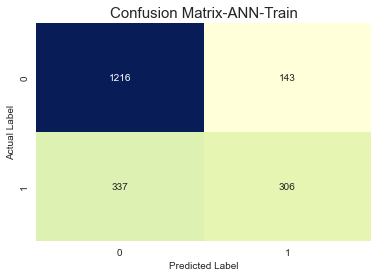

In [138]:
sns.heatmap(confusion_matrix(train_labels, ytrain_predict3),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-ANN-Train',fontsize=15)
plt.show();


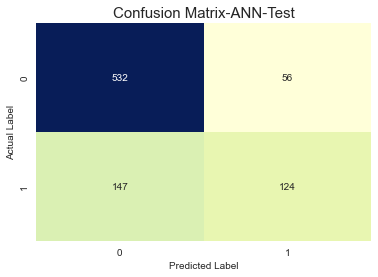

In [139]:
sns.heatmap(confusion_matrix(test_labels,ytest_predict3),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix-ANN-Test',fontsize=15)
plt.show();


#### Accuracy

In [140]:
ann_train_accu = best_grid3.score(X_train_sc,train_labels)
ann_train_accu

0.7602397602397603

In [141]:
ann_test_accu = best_grid3.score(X_test_sc,test_labels)
ann_test_accu

0.7636786961583236

#### ROC Curve and AUC Score

AUC Score for ANN train data: 0.785


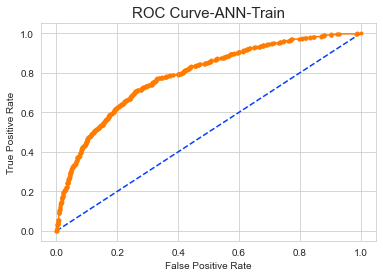

In [142]:
probs = best_grid3.predict_proba(X_train_sc)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
ann_train_auc = roc_auc_score(train_labels, probs)
print('AUC Score for ANN train data: %.3f' % ann_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
ann_train_fpr, ann_train_tpr, ann_train_thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_train_fpr, ann_train_tpr, marker='.')
plt.title('ROC Curve-ANN-Train',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC Score for ANN test data: 0.795


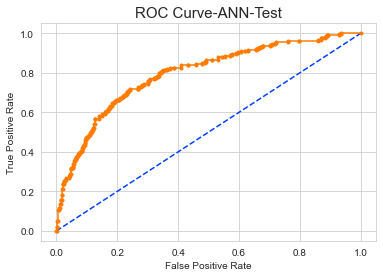

In [143]:
probs = best_grid3.predict_proba(X_test_sc)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
ann_test_auc = roc_auc_score(test_labels, probs)
print('AUC Score for ANN test data: %.3f' % ann_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
ann_test_fpr, ann_test_tpr, ann_test_thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(ann_test_fpr, ann_test_tpr, marker='.')
plt.title('ROC Curve-ANN-Test',fontsize=15)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

## 2.4 Final Model: Compare all the models and write an inference which model is best/optimized.


### Tabular form of Performance Metrics

In [144]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_accu,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_accu,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rfcl_train_accu,rfcl_train_auc,rfcl_train_recall,rfcl_train_precision,rfcl_train_f1],
        'Random Forest Test':[rfcl_test_accu,rfcl_test_auc,rfcl_test_recall,rfcl_test_precision,rfcl_test_f1],
       'Neural Network Train':[ann_train_accu,ann_train_auc,ann_train_recall,ann_train_precision,ann_train_f1],
        'Neural Network Test':[ann_test_accu,ann_test_auc,ann_test_recall,ann_test_precision,ann_test_f1]},index=index)
round(data,2)


,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.77,0.79,0.78,0.76,0.76
AUC,0.82,0.78,0.83,0.81,0.79,0.80
Recall,0.53,0.51,0.56,0.54,0.48,0.46
Precision,0.71,0.69,0.71,0.70,0.68,0.69
F1 Score,0.61,0.58,0.63,0.61,0.56,0.55


### ROC Curve for all 3 Models for Training Data

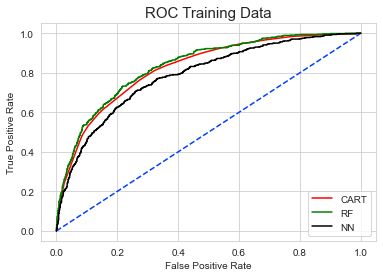

In [145]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rfcl_train_fpr,rfcl_train_tpr,color='green',label="RF")
plt.plot(ann_train_fpr,ann_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Training Data',fontsize=15)
plt.legend(loc='lower right');


### ROC Curve for all 3 Models for Testing Data

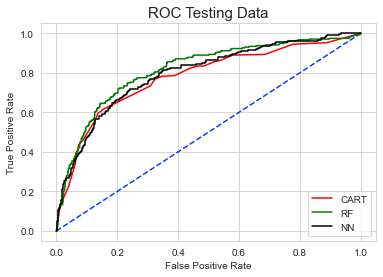

In [146]:
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rfcl_test_fpr,rfcl_test_tpr,color='green',label="RF")
plt.plot(ann_test_fpr,ann_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Testing Data',fontsize=15)
plt.legend(loc='lower right');


Out of all the 3 models, Random Forest has slightly better performance than the CART and ANN model which can be inferred from the above performance metrics. So Random Forest model is the best/optimized model.



## 2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations


From running algorithms like CART, Random Forest and Artificial Neural Networks I can infer that Random Forest performed better than the other algorithms. Adding more features like insurance amount and income status can lead to better analysis. Insurance with higher sales has more claim frequency than lower sales.

### Recommendations 

•  Gold Plan Insurance has less number of purchases. Hence it is to be marketed more.

• Since data suggest that more than 90% of insurance is done by Online mode so we can infer that offline experiences must be improved.

• More sales happen through Travel Agency than Airlines and the claims are processed more at Airlines. To improve sales through Travel Agency proper advertising can be done and gifts can be given.

• JZI & CWT agency should increase sales as they have lower sales. To improve sales through JZI & CWT proper advertising can be done and gifts can be given.

•  Asia as Destination has less number of sales but less claim frequency than its unclaimed frequency. This destination package can be promoted more. 
